# Análisis de ventas globales para la tienda Ice

## Contenido

* [Introducción](#intro)
* [1. Descripción y preparación de los datos](#data_review)
    * [1.1. Estadísticas descriptivas de los datos](#stats)
    * [1.2. Limpieza de datos](#clean)
    * [1.3. Tratamiento de valores ausentes](#missing)
    * [1.4. Tratamiento de valores duplicados](#duplicates)
    * [1.5. Creación de columnas de valor](#columns)
* [2. Análisis exploratorio de los datos.](#data_analysis)
    * [2.1. Análisis exploratorio](#analysis)
    * [2.2. Filtrado de datos para el modelo 2017](#filter)
    * [2.3. Análisis exploratorio del nuevo dataset](#new_analysis)
    * [2.4. Análisis descriptivo por regiones](#regions_analysis)
* [3. Pruebas de las hipótesis estadísticas](#hypothesis)
    * [3.1. Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas](#hypothesis_1)
    * [3.2. Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes](#hypothesis_2)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>

La tienda online Ice, que vende videojuegos por todo el mundo, tiene las reseñas de los usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos. El propósito del proyecto es identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias. Hay datos que se remontan a 2016 y se está planeando una campaña para 2017.

### Descripción de los datos.

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## 1. Descripción y preparación de los datos. <a id='data_review'></a>

Observaremos el estado original de los datos, si existen valores ausentes, el tipo de almacenamiento de cada columna y algunas primeras estadísticas descriptivas para darnos una idea de nuestro dataset.

In [1]:
# Importar los paquetes para el análisis.
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Extraer el dataframe de los datos.
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 1.1. Estadísticas descriptivas de los datos. <a id='stats'></a>

In [3]:
# Extraer información de las columnas.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Tenemos un total de 16715 entradas o filas, en donde muchas columnas presentan datos ausentes. Analizaremos esto con más detalle más adelante.

Al parecer solo hay dos columnas con el tipo de dato erróneo y se trata de Year_of_Release (trataremos a esta columna para convertirla a un entero) y de User_Score (convertiremos a número flotante).

In [4]:
# Estadisticas descriptivas de las columnas numericas.
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


El menor año observable en los datos es 1980 y el más reciente 2016, algunos juegos no tienen años registrados.

Más de la mitad de los juegos no tienen un Critic_Score.

Observando la distribución de ventas, nos damos cuenta de que al menos el 25% de los datos de cada columna tiene 0 como valores de venta. Esta información puede ser interesante para indagar más a fondo.

In [5]:
# Estadisticas descriptivas de las columnas categoricas.
games.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Existen dos juegos con la columna Name nula y con la columna Genre nula. Echaremos un vistazo a estas observaciones.

Entre otras abstracciones, conocemos que hay 12 tipos diferentes de géneros, 8 tipos de Ratings y 31 tipos de plataformas. También que la columna User_Score no solo tiene, 2424 juegos tbd (a ser determinados), sino que también presenta una gran cantidad de valores ausentes. Este también es el caso de la columna Rating.

### 1.2. Limpieza de datos. <a id='clean'></a>

#### Limpieza de encabezados

Nos encargaremos de unificar el estilo de los encabezados para facilitar su uso, haciendo que todos estén en minúsculas.

In [6]:
# Reemplazar los nombres de las columnas a minusculas.
new_columns = []
for column in games.columns:
    new_columns.append(column.lower())

# Asignar los nuevos nombres a las columnas.
games.columns = new_columns
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
games.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Reasignación del tipo de datos

Como ya mencionamos, convertiremos el tipo de dato de las columnas year_of_release y user_score al tipo correcto.

year_of_release requiere un cambio al tipo entero, ya que los años no suelen expresar fracciones sino valores completos. Igualmente, user_score podría requerir aplicación de operaciones aritméticas y siento que el tipo object no será viable, esta es la razón por la que debe ser transformado a tipo float.

In [8]:
# Reasignando el tipo de year_of_release
games['year_of_release'] = games['year_of_release'].astype('Int32')
games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int32

En el caso de user_score debemos tener en cuenta que él registra algunos valores ausentes como 'tbd'; sin embargo, estos no aportan nada de información, por lo que los trataremos igual que un valor nulo NaN. Para ello, debemos hacer un paso antes de la transformación del tipo a float.

In [9]:
# Reasignando el tipo de user_score
# Transformando valores 'tbd' a NaN
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

# Asignando el tipo a float
games['user_score'] = games['user_score'].astype('float')
games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

### 1.3. Tratamiento de valores ausentes. <a id='missing'></a>

Para iniciar este proceso, observemos nuevamente las columnas que presentan valores nulos y la cantidad de filas nulas que exponen.

In [10]:
# Revision de columnas con valores nulos y su cantidad.
games.isna().sum()[games.isna().sum() > 0]

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         9125
rating             6766
dtype: int64

#### Columnas name y genre

Comenzamos estudiando los valores nulos de name y genre los cuales aparecen en las mismas filas y bajo algunas coincidencias interesantes.

In [11]:
# Filas con valores nulos de name
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


En este par de filas podemos observar algunas situaciones relevantes, como por ejemplo que la plataforma y el año son compartidos y que el valor de género también es nulo en las dos filas.

Realmente de estas filas las únicas columnas con información relevante son las ventas por país es por eso que intentaremos reunir toda su información útil en una sola fila que tendrá como nombre 'Unknown' y como género 'Unknown' también, de esta manera no descartaremos sus valores de ventas por país, pero tampoco asignaremos estos valores a otra categoría o género a la que tal vez no corresponda alterando posibles conclusiones y análisis.

In [12]:
# Reasignaremos todos los datos utiles a la fila 659.
games.loc[659, 'name'] = 'Unknown'
games.loc[659, 'genre'] = 'Unknown'
games.loc[659, 'jp_sales'] = 0.03

# Descartamos la segunda fila con indice 14244.
games.dropna(subset=['name'], inplace=True)
games.reset_index(drop=True, inplace=True)

games[games['name'] == 'Unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993,Unknown,1.78,0.53,0.03,0.08,NaN,NaN,NaN


In [13]:
# Verificación de columnas con valores nulos y su cantidad.
games.isna().sum()[games.isna().sum() > 0]

year_of_release     269
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Ahora toda la información relevante se encuentra en un solo juego 'Unknown' rescatando los valores de ventas por país y no alterando los valores de ventas por año ni por género registrados.

#### Columna year_of_release

In [14]:
# Filas con valores nulos de year_of_release.
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16372,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16404,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16447,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16457,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Para esta columna se observa que tenemos 269 valores nulos; para poder asignarles un valor, se pensaron en las siguientes alternativas:

- Utilizar los años de los mismos juegos (nombres) que se lanzaron en otras plataformas.
- Utilizar la información que se pudiera encontrar en el nombre del juego.

A pesar de ser dos opciones muy interesantes, no podemos inclinarnos por ninguna de las dos, ya que en muchos casos los juegos son lanzados para diferentes consolas en años distintos y pueden cambiar por región, por lo que la primera opción se descartaría. También el hecho de que en el título del juego se incluya el año (como sucede en muchos juegos deportivos como FIFA Soccer 2004) no nos asegura que el año de lanzamiento haya sido ese, ya que hay casos en que sí coincide y hay otros en donde es el año anterior.

No teniendo acceso a otras tablas o información que nos den un mayor respaldo de estos datos, se optó por dejar estos años como valores nulos y descartar estas filas en análisis en donde se requiera de un filtro por año.

#### Columnas critic_score y user_score

In [15]:
# Filas con valores nulos de critic_score.
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
# Filas con valores nulos de user_score.
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Las columnas critic_score y user_score contienen información muy relevante para el análisis de datos que realizaremos, por lo que una incorrecta asignación de valores ausentes alterará por completo los resultados y podría terminar en conclusiones incorrectas. Teniendo en cuenta que la cantidad de valores ausentes en estas dos columnas ronda el 50% del total de los datos, lo cual representa una porción muy importante del dataset, debemos reflexionar muy bien en esta etapa.

Al observar las calificaciones de los mismos títulos, pero en plataformas distintas, nos damos cuenta de que estas difieren, por lo que no podemos extraer datos de estas coincidencias para ninguna de las dos columnas.

Teniendo en cuenta lo anterior, lo más prudente sería no alterar estos datos y mantener los valores nulos como tal mientras no tengamos otra fuente de información fiable y complementaria, alterar o llenar los valores nulos con la media o la mediana implicaría cambiar alrededor del 50% de datos y es una porción muy significativa que modificaría los resultados evaluativos que involucren estas columnas en conjunto con otras.

In [17]:
# Juegos que comparten nombre pero en diferentes plataformas.
games[games.duplicated(subset=['name'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14657,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65.0,NaN,T
3120,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
2583,pro evolution soccer 2011,PSP,2010,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
7149,pro evolution soccer 2011,Wii,2010,Sports,0.07,0.10,0.03,0.02,78.0,5.4,E
12648,pro evolution soccer 2011,PC,2010,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
15611,uDraw Studio: Instant Artist,X360,2011,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


Aquí confirmamos que, a pesar de que los títulos compartan nombre, difieren en su calificación dependiendo de su plataforma.

La razón de esta cantidad de valores ausentes está relacionada tanto con el año de lanzamiento del juego como con su plataforma, a continuación podemos ver un par de tablas que nos demuestran que las reseñas son casi nulas hasta después de 1995 y que existen múltiples plataformas en donde las reseñas no son tenidas en cuenta.

In [18]:
# Cantidad de reseñas por año de lanzamiento.
games.groupby('year_of_release')['year_of_release', 'critic_score', 'user_score'].count()

,year_of_release,critic_score,user_score
year_of_release,,,
1980,9,0,0
1981,46,0,0
1982,36,0,0
1983,17,0,0
1984,14,0,0
1985,14,1,1
1986,21,0,0
1987,16,0,0
1988,15,1,1


In [19]:
# Cantidad de reseñas por plataforma.
games.groupby('platform')['platform', 'critic_score', 'user_score'].count()

,platform,critic_score,user_score
platform,,,
2600,133,0,0
3DO,3,0,0
3DS,520,168,174
DC,52,14,14
DS,2151,717,516
GB,98,0,0
GBA,822,438,255
GC,556,448,366
GEN,28,0,0


#### Columna rating

In [20]:
# Filas con valores nulos de rating.
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
# Explorando si un mismo juego puede tener mas de un rating.
# Se hallan juegos con el mismo nombre, se agrupan luego por nombre y en su columna rating se identifica cuantos valores registrados unicos existen.
games[(games.duplicated(subset=['name'], keep=False))].groupby('name')['rating'].agg(['unique', 'nunique']).sort_values('nunique', ascending=False)

,unique,nunique
name,,
The Sims 2: Castaway,"[T, E10+, E]",3
Dawn of Discovery,"[T, E10+, E]",3
Ghostbusters: The Video Game,"[E10+, T, E]",3
"The Chronicles of Narnia: The Lion, The Witch and The Wardrobe","[E, T, E10+]",3
DiRT 2,"[T, E10+, E]",3
...,...,...
Sengoku Basara 3 Utage,[nan],0
Sengoku Basara 4: Sumeragi,[nan],0
Sengoku Basara: Sanada Yukimura-Den,[nan],0


La columna rating es algo similar a las dos columnas que recién estudiamos, ya que la cantidad de valores nulos ronda el 40% del dataframe, a esta columna tampoco podemos reasignarle los valores nulos basándonos en los mismos títulos de otras plataformas, ya que evidenciamos que estas pueden variar entre plataformas a pesar de ser el mismo título. También para años mayores a 1995 se inicia a tener realmente una cantidad considerable de registros de este dato y de la misma manera algunas consolas no registran información al respecto.

In [22]:
# Cantidad de filas con rating por año de lanzamiento.
games.groupby('year_of_release')['year_of_release', 'rating'].count()

,year_of_release,rating
year_of_release,,
1980,9,0
1981,46,0
1982,36,0
1983,17,0
1984,14,0
1985,14,1
1986,21,0
1987,16,0
1988,15,1


In [23]:
# Cantidad de filas con rating por plataforma.
games.groupby('platform')['platform', 'rating'].count()

,platform,rating
platform,,
2600,133,0
3DO,3,0
3DS,520,228
DC,52,14
DS,2151,1273
GB,98,0
GBA,822,522
GC,556,469
GEN,28,0


Dado lo visto y sin información adicional la columna rating permanecera con sus valores nulos intactos.

### 1.4. Tratamiento de valores duplicados. <a id='duplicates'></a>

Revisaremos valores duplicados para 3 tipos de coincidencias distintas entre las columnas name, platform y year_of_release:

In [24]:
# Valores duplicados para las tres columnas.
games[games.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16229,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Al parecer solo existe una coincidencia exacta para las 3 columnas y al parecer la información más completa la maneja la primera fila, por lo que será la fila que mantengamos en el dataframe.

In [25]:
# Mantenemos la primera coincidencia y descartamos la segunda.
games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True, ignore_index=True)

In [26]:
# Evaluamos valores duplicados en nombre y plataforma.
games[games.duplicated(['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


En este caso a pesar de observar más valores duplicados el hecho de que el año de lanzamiento sea diferente nos brinda información relevante, ya que muchos juegos son lanzados nuevamente en las mismas plataformas, pero de forma actualizada (remakes), es por esto que estos valores no serán descartados, ya que se tratan de juegos y entregas distintas.

### 1.5. Creación de columnas de valor. <a id='columns'></a>

Calcularemos las ventas totales (la suma de las ventas en todas las regiones) para cada juego y añadiremos estos valores en una columna separada.

In [27]:
# Nueva columna de ventas totales
games['total_sales'] = games[['na_sales','jp_sales','eu_sales','other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## 2. Análisis exploratorio de los datos. <a id='data_analysis'></a>

### 2.1. Análisis exploratorio. <a id='analysis'></a>

Iniciaremos nuestro análisis observando los lanzamientos que se realizaron en cada año y las ganancias generadas por estos juegos.

In [28]:
# Juegos lanzados por año junto con el total de ventas anuales.
year_evaluation = games.groupby('year_of_release')['total_sales'].agg(['count', 'sum'])
year_evaluation.columns = ['games_released', 'total_sales']
year_evaluation

,games_released,total_sales
year_of_release,,
1980,9,11.38
1981,46,35.68
1982,36,28.88
1983,17,16.80
1984,14,50.35
1985,14,53.95
1986,21,37.08
1987,16,21.70
1988,15,47.21


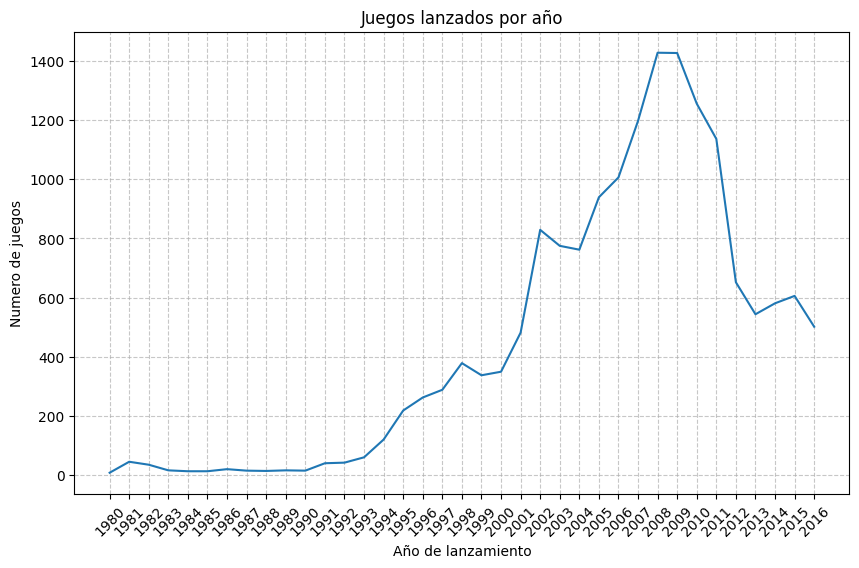

In [29]:
# Vizualizando los datos de juegos por año.
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=year_evaluation, x=year_evaluation.index, y='games_released')

#Dando formato al grafico
plt.grid(linestyle='--', alpha=0.7)
ax.set_xticks(year_evaluation.index.astype(int))
plt.title('Juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Numero de juegos')
plt.xticks(rotation=45)
plt.show()

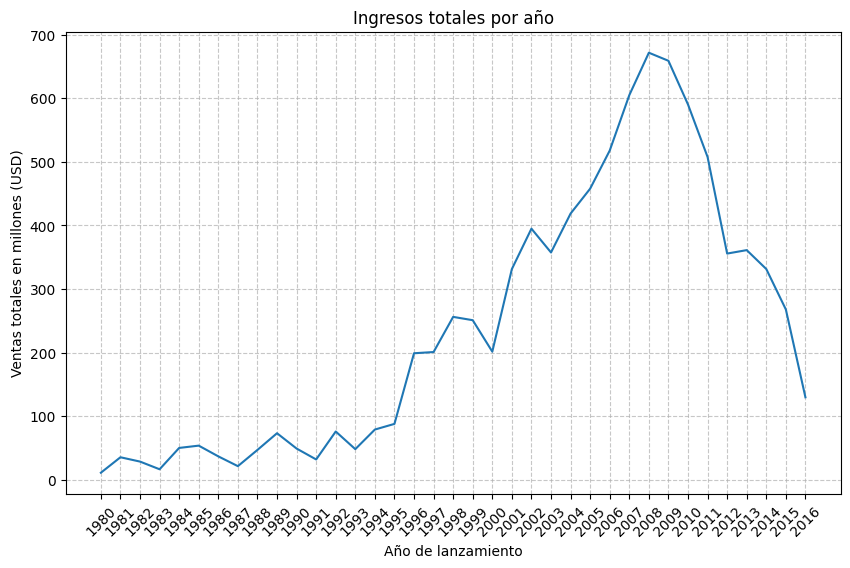

In [30]:
# Vizualizando los ingresos de juegos por año.
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=year_evaluation, x=year_evaluation.index, y='total_sales')

# Dando formato al grafico
plt.grid(linestyle='--', alpha=0.7)
ax.set_xticks(year_evaluation.index.astype(int))
plt.title('Ingresos totales por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales en millones (USD)')
plt.xticks(rotation=45)
plt.show()

Podemos destacar que a partir del año **1994** la cantidad de juegos lanzados incrementa considerablemente y que a partir del año **1995** los ingresos anuales también se incrementan. El pico de lanzamiento de juegos fue alcanzado en el año 2008 y coincide con el pico de ventas totales; a partir de aquí se evidencia un descenso año tras año.

Ahora estudiemos como varían las ventas de una plataforma a otra en el tiempo.

In [31]:
# Juegos lanzados por plataforma junto con el total de ventas anuales.
platform_evaluation = games.groupby(['platform'])['total_sales'].agg(['count', 'sum'])
platform_evaluation.columns = year_evaluation.columns = ['games_released', 'total_sales']
platform_evaluation

,games_released,total_sales
platform,,
2600,133,96.98
3DO,3,0.10
3DS,520,259.00
DC,52,15.95
DS,2151,806.12
GB,98,255.46
GBA,822,317.85
GC,556,198.93
GEN,28,30.77


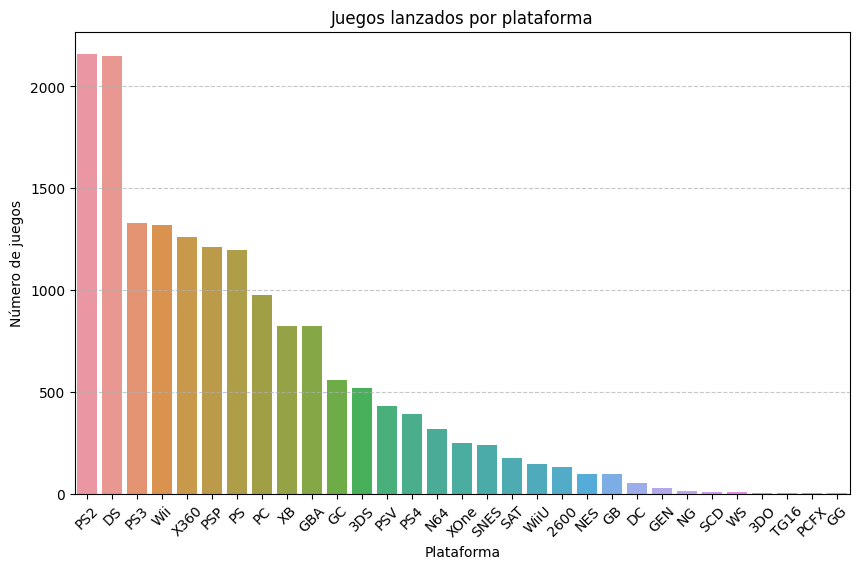

In [32]:
# Organizando por numero de juegos de mayor a menor
platform_evaluation.sort_values('games_released', ascending=False, inplace=True)

# Vizualizando los juegos por plataforma.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=platform_evaluation, x=platform_evaluation.index, y='games_released')

# Dando formato al grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Juegos lanzados por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()

Podemos observar que hay un gran contraste entre algunas plataformas y la cantidad de juegos lanzados en ellas. Esto lo tendremos en cuenta junto con los siguientes análisis para saber qué datos son los más relevantes para nuestros estudios.

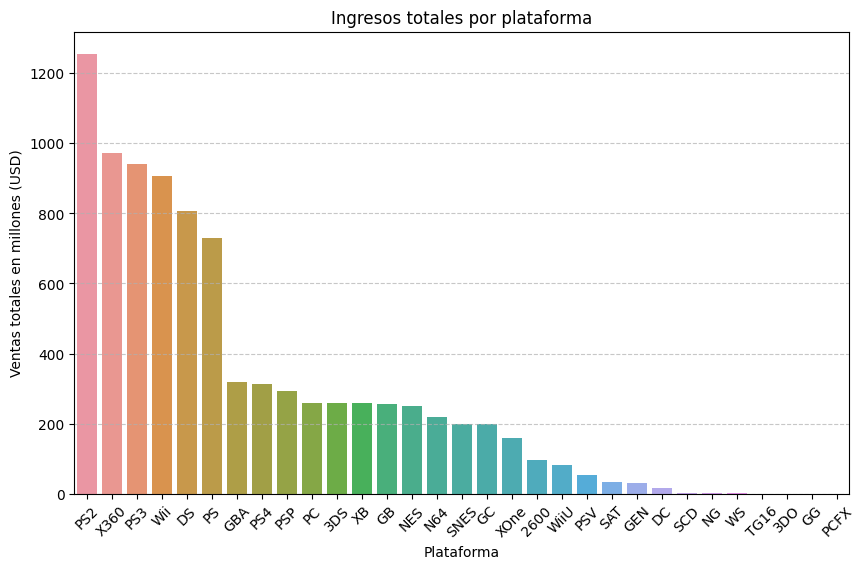

In [33]:
# Organizando por ventas totales de mayor a menor
platform_evaluation.sort_values('total_sales', ascending=False, inplace=True)

# Vizualizando los ingresos totales por plataforma.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=platform_evaluation, x=platform_evaluation.index, y='total_sales')

# Dando formato al grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Ingresos totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales en millones (USD)')
plt.xticks(rotation=45)
plt.show()

En la distribución de ganancias por plataforma, podemos segregar las plataformas en 2 categorías: altas (mayores a 600 millones de dólares), bajas (menores a 600 millones de dólares). Estudiemos la distribución de las ganancias altas a través del tiempo.

In [34]:
# Encontrando las plataformas con ventas altas
high_condition = platform_evaluation['total_sales'] >= 400
platforms_high = list(platform_evaluation[high_condition].index)

platforms_high

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [35]:
# Filtrando las tablas de datos para las plataformas de ventas altas.
high_platform_evaluation_yearly = games[games['platform'].isin(platforms_high)]

# Encontrando el numero de juegos y las ventas por año y por plataforma.
high_platform_evaluation_yearly = high_platform_evaluation_yearly.groupby(['platform', 'year_of_release'])['total_sales'].agg(['count', 'sum'])
high_platform_evaluation_yearly.columns = high_platform_evaluation_yearly.columns = ['games_released', 'total_sales']
high_platform_evaluation_yearly.reset_index(inplace=True)

high_platform_evaluation_yearly

,platform,year_of_release,games_released,total_sales
0,DS,1985,1,0.02
1,DS,2004,23,17.27
2,DS,2005,118,130.14
3,DS,2006,201,119.81
4,DS,2007,376,146.94
...,...,...,...,...
62,X360,2012,106,99.74
63,X360,2013,75,88.58
64,X360,2014,63,34.74
65,X360,2015,35,11.96


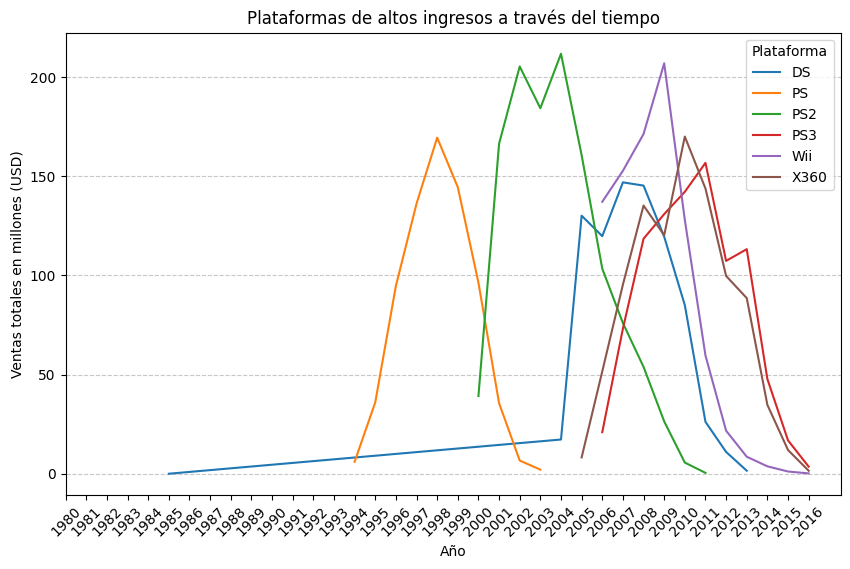

In [36]:
# Visualizando los resultados.
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=high_platform_evaluation_yearly, x='year_of_release', y='total_sales', hue='platform')

# Dando formato al grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(year_evaluation.index.astype(int))
plt.title('Plataformas de altos ingresos a través del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas totales en millones (USD)')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)
plt.show()

Observando los valores de las ganancias a través del tiempo de las plataformas con mayores ingresos, notamos que son plataformas que lanzan videojuegos desde el año **1994**, todas manifiestan un pico de ventas unos años después de su lanzamiento y luego un descenso.

__Nota: el primer dato de la plataforma DS es un dato erróneo, ya que esta plataforma fue lanzada en el 2004.__

Estudiemos otro sesgo, revisemos las plataformas basándonos en el último año en que fue registrado un videojuego para su plataforma. Serán antiguas si su juego más reciente fue lanzado antes del año 2000, intermedias si están entre el 2000 y el 2010 y recientes para años mayores o iguales al 2010.

In [37]:
# Identificando el ultimo año que cada plataforma lanzo un juego.
max_dates = games.groupby('platform')['year_of_release'].max().sort_values()
max_dates

platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SNES    1999
SAT     1999
WS      2001
GB      2001
N64     2002
PS      2003
GC      2007
GBA     2007
XB      2008
DC      2008
PS2     2011
DS      2013
PSP     2015
PS3     2016
PS4     2016
PSV     2016
3DS     2016
Wii     2016
WiiU    2016
X360    2016
PC      2016
XOne    2016
Name: year_of_release, dtype: Int32

In [38]:
# Encontrando las plataformas mas antiguas.
old_platforms = list(max_dates[max_dates < 2000].index)

old_platforms

['2600', 'GG', 'SCD', 'GEN', 'NES', '3DO', 'TG16', 'NG', 'PCFX', 'SNES', 'SAT']

In [39]:
# Filtrando las tablas de datos para las plataformas antiguas.
old_platform_evaluation_yearly = games[games['platform'].isin(old_platforms)]

# Encontrando el numero de juegos y las ventas por año y por plataforma.
old_platform_evaluation_yearly = old_platform_evaluation_yearly.groupby(['platform', 'year_of_release'])['total_sales'].agg(['count', 'sum'])
old_platform_evaluation_yearly.columns = old_platform_evaluation_yearly.columns = ['games_released', 'total_sales']
old_platform_evaluation_yearly.reset_index(inplace=True)

old_platform_evaluation_yearly.head()

,platform,year_of_release,games_released,total_sales
0,2600,1980,9,11.38
1,2600,1981,46,35.68
2,2600,1982,36,28.88
3,2600,1983,11,5.84
4,2600,1984,1,0.27


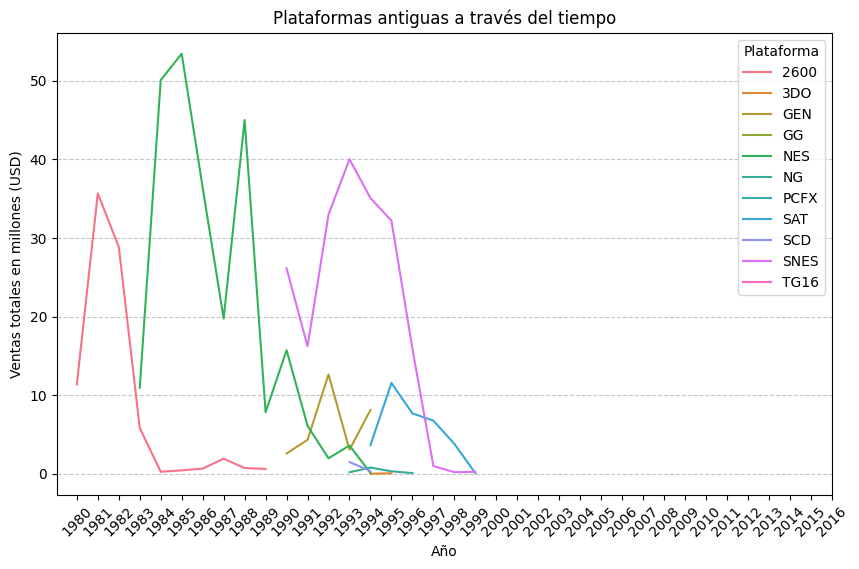

In [40]:
# Visualizando los resultados.
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=old_platform_evaluation_yearly, x='year_of_release', y='total_sales', hue='platform')

# Dando formato al grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(year_evaluation.index.astype(int))
plt.title('Plataformas antiguas a través del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas totales en millones (USD)')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)
plt.show()

Al observar la gráfica de plataformas antiguas a través del tiempo, notamos que ninguna de ellas supera los 60 millones de dólares en ningún año, tendremos esto en cuenta para futuros análisis.

In [41]:
# Encontrando las plataformas intermedias.
mid_platforms = list(max_dates[(max_dates >= 2000) & (max_dates < 2010)].index)

mid_platforms

['WS', 'GB', 'N64', 'PS', 'GC', 'GBA', 'XB', 'DC']

In [42]:
# Filtrando las tablas de datos para las plataformas intermedias.
mid_platform_evaluation_yearly = games[games['platform'].isin(mid_platforms)]

# Encontrando el numero de juegos y las ventas por año y por plataforma.
mid_platform_evaluation_yearly = mid_platform_evaluation_yearly.groupby(['platform', 'year_of_release'])['total_sales'].agg(['count', 'sum'])
mid_platform_evaluation_yearly.columns = mid_platform_evaluation_yearly.columns = ['games_released', 'total_sales']
mid_platform_evaluation_yearly.reset_index(inplace=True)

mid_platform_evaluation_yearly

,platform,year_of_release,games_released,total_sales
0,DC,1998,7,3.38
1,DC,1999,14,5.16
2,DC,2000,20,5.99
3,DC,2001,8,1.07
4,DC,2002,1,0.29
...,...,...,...,...
59,XB,2004,177,65.42
60,XB,2005,179,49.08
61,XB,2006,62,10.04
62,XB,2007,3,0.55


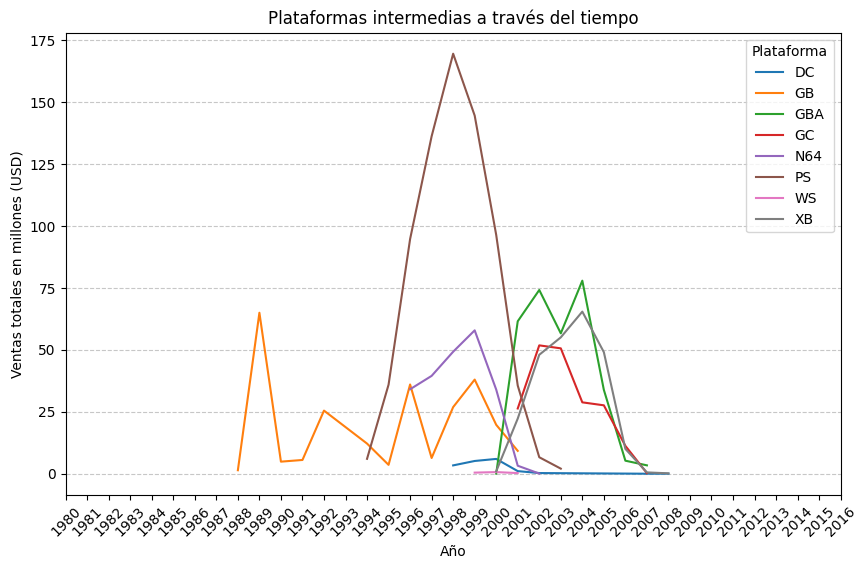

In [43]:
# Visualizando los resultados.
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=mid_platform_evaluation_yearly, x='year_of_release', y='total_sales', hue='platform')

# Dando formato al grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(year_evaluation.index.astype(int))
plt.title('Plataformas intermedias a través del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas totales en millones (USD)')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)
plt.show()

Este grupo de plataformas alcanza mejores ventas en su mayoría, si la comparamos con el grupo previo. Destacamos que la plataforma PS es la única del grupo de 'altas ventas' que pertenece también a este grupo, haciendo gran contraste con las demás plataformas.

También notamos que todas las plataformas, a excepción de GB, tienen su primer registro a partir de **1994**.

In [44]:
# Encontrando las plataformas recientes.
recent_platforms = list(max_dates[max_dates >= 2010].index)

recent_platforms

['PS2',
 'DS',
 'PSP',
 'PS3',
 'PS4',
 'PSV',
 '3DS',
 'Wii',
 'WiiU',
 'X360',
 'PC',
 'XOne']

In [45]:
# Filtrando las tablas de datos para las plataformas recientes.
new_platform_evaluation_yearly = games[games['platform'].isin(recent_platforms)]

# Encontrando el numero de juegos y las ventas por año y por plataforma.
new_platform_evaluation_yearly = new_platform_evaluation_yearly.groupby(['platform', 'year_of_release'])['total_sales'].agg(['count', 'sum'])
new_platform_evaluation_yearly.columns = new_platform_evaluation_yearly.columns = ['games_released', 'total_sales']
new_platform_evaluation_yearly.reset_index(inplace=True)

new_platform_evaluation_yearly

,platform,year_of_release,games_released,total_sales
0,3DS,2011,116,63.20
1,3DS,2012,93,51.36
2,3DS,2013,91,56.57
3,3DS,2014,80,43.76
4,3DS,2015,86,27.78
...,...,...,...,...
115,X360,2016,13,1.52
116,XOne,2013,19,18.96
117,XOne,2014,61,54.07
118,XOne,2015,80,60.14


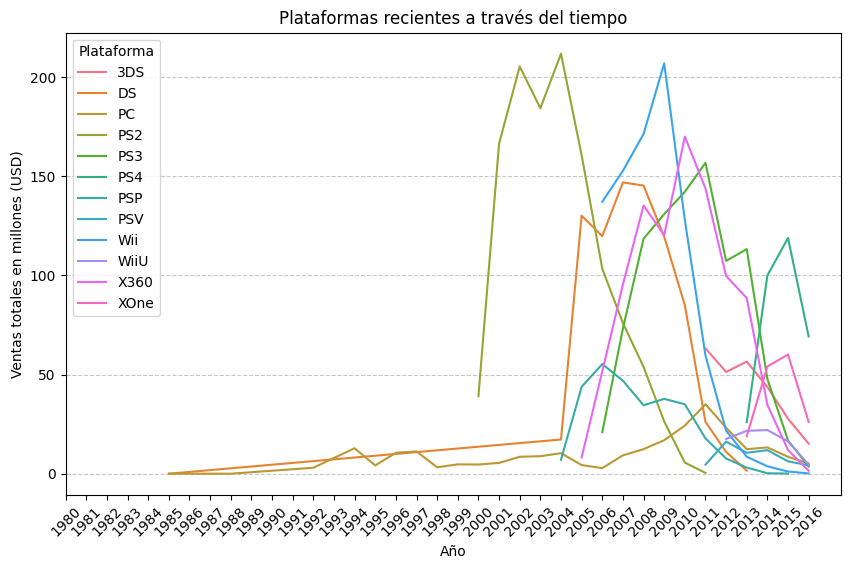

In [46]:
# Visualizando los resultados.
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=new_platform_evaluation_yearly, x='year_of_release', y='total_sales', hue='platform')

# Dando formato al grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(year_evaluation.index.astype(int))
plt.title('Plataformas recientes a través del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas totales en millones (USD)')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)
plt.show()

En la gráfica de plataformas recientes a través del tiempo, podemos observar una mayor cantidad de ingresos que en el resto de grupos; sin embargo, no todas las plataformas cumplen esta premisa, ya que plataformas como XOne, PC o WiiU no muestran grandes ingresos.

Otra conclusión interesante es que la plataforma con mayor permanencia en el mercado es el PC.

__Nota: el primer dato de la plataforma DS es un dato erróneo, ya que esta plataforma fue lanzada en el 2004.__

Para continuar, revisaremos la permanencia de las plataformas en el mercado, identificando el primer año en el que un juego es lanzado en la plataforma y el último.

In [47]:
def categorize_year(year):
    if year < 2000:
        return 'old'
    elif year < 2010:
        return 'mid'
    else:
        return 'new'

In [48]:
# Identificando el primer año que cada plataforma lanzo un juego.
min_dates = games.groupby('platform')['year_of_release'].min().sort_values()

# Unimos las dos columnas y encontramos la diferencia entre las dos.
games_duration = pd.concat([min_dates, max_dates], axis=1)
games_duration.columns = ['first_year', 'last_year']

games_duration.loc['DS', 'first_year'] = 2004 # Realizamos la correcion mencionada anteriormente para DS.

games_duration.reset_index(inplace=True)
games_duration['permanence'] = games_duration['last_year'] - games_duration['first_year']
games_duration.sort_values('permanence', ascending=False, ignore_index=True, inplace=True)

# Aplicar la función a la columna 'last_year'
games_duration['group'] = games_duration['last_year'].apply(categorize_year)

# Organizar por grupo y permanencia
group_order = ['old', 'mid', 'new']
games_duration['group'] = pd.Categorical(games_duration['group'], categories=group_order, ordered=True)
games_duration.sort_values(['group', 'permanence'], ascending=[False, False], ignore_index=True, inplace=True)
games_duration

,platform,first_year,last_year,permanence,group
0,PC,1985,2016,31,new
1,X360,2005,2016,11,new
2,PSP,2004,2015,11,new
3,PS2,2000,2011,11,new
4,Wii,2006,2016,10,new
5,PS3,2006,2016,10,new
6,DS,2004,2013,9,new
7,3DS,2011,2016,5,new
8,PSV,2011,2016,5,new
9,WiiU,2012,2016,4,new


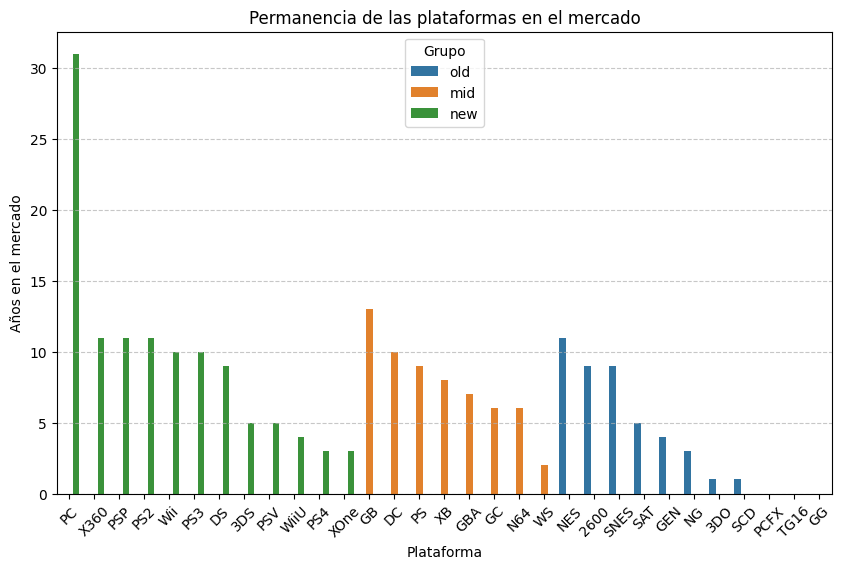

In [49]:
# Visualizando los resultados.
plt.figure(figsize=(10, 6))
sns.barplot(data=games_duration, x='platform', y='permanence', hue='group', hue_order=group_order)

# Dando formato al grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Permanencia de las plataformas en el mercado')
plt.xlabel('Plataforma')
plt.ylabel('Años en el mercado')
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Promedio de duracion en el mercado de las plataformas por grupo.
games_duration.groupby('group')['permanence'].mean()

group
old    3.909091
mid       7.625
new    9.416667
Name: permanence, dtype: Float64

Podemos apreciar como a través del tiempo las plataformas permanecen más en los años, las plataformas más antiguas tienen una duración promedio de 3.9 años mientras que las más recientes permanecen en promedio 9.4 años, esto puede estar relacionado con que muchas de las plataformas recientes recauden una mayor cantidad de dinero.

### 2.2. Filtrado de datos para el modelo 2017. <a id='filter'></a>

Determinando nuestros resultados, aplicaremos un filtro por año en donde solo tendremos en cuenta los juegos desde el año 2013 en adelante. Aquí están las razones por las que decidimos que este filtro podría ser representativo para nuestro estudio.

- En los años recientes se tienen registros representativos para las valoraciones critic_score, user_score y rating.
- El registro de las plataformas con altos ingresos muestra un comportamiento bajista en ventas en los últimos años; tomar años recientes podrá representar mejor el estado actual del mercado de videojuegos.
- Las plataformas más recientes como PS4 y XOne inician sus ventas a partir del 2013, lo que nos da acceso a toda la información de los juegos para estas plataformas emergentes.

In [51]:
# Filtrando los juegos con años de lanzamiento mayores e iguales a 1994.
games_filtered = games[games['year_of_release'] >= 2013].reset_index(drop=True)
games_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


También se descartarán los datos de las plataformas que no superen en ventas totales los 10 millones de dólares, ya que no contienen datos de impacto para el estudio.

In [52]:
# Identificando las plataformas que seran descartadas por los criterios mencionados.
platforms_total_sales = games_filtered.groupby('platform')['total_sales'].sum().sort_values()

# Describing conditions
platforms_to_exclude = list(platforms_total_sales[platforms_total_sales < 10].index)

platforms_to_exclude

['DS', 'PSP']

In [53]:
# Filtrando los juegos por la nueva condicion de plataformas.
games_filtered = games_filtered[~games_filtered['platform'].isin(platforms_to_exclude)]
games_filtered.reset_index(drop=True, inplace=True)
games_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2153,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2154,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2155,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2156,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### 2.3. Análisis exploratorio del nuevo dataset. <a id='new_analysis'></a>

Ahora tenemos datos más representativos para nuestro estudio del 2017. Recapitulemos algunas observaciones para contemplar el nuevo dataset, por ejemplo, observemos las distribuciones de las ventas totales por plataforma. 

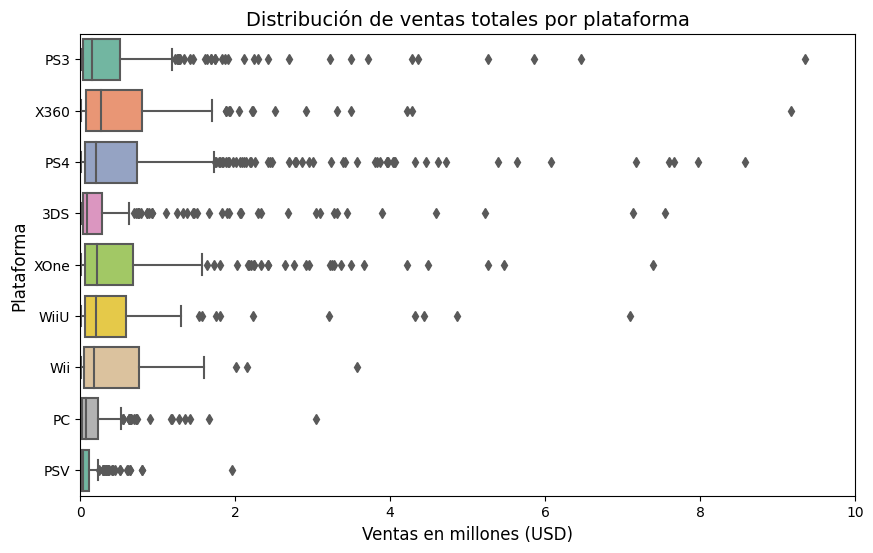

In [54]:
# Diagrama de caja para visualizar la distribución de las ventas globales de todos los juegos, desglosados por plataforma.
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_filtered, x="total_sales", y="platform", palette="Set2")

# Agregar título y etiquetas a los ejes
plt.title("Distribución de ventas totales por plataforma", fontsize=14)
plt.xlabel("Ventas en millones (USD)", fontsize=12)
plt.ylabel("Plataforma", fontsize=12)

# Limitar el eje x a un máximo de 10 millones
plt.xlim(0, 10)

# Mostrar el gráfico
plt.show()

Al observar las distribuciones de ventas totales por plataforma podemos ver una gran cantidad de valores atípicos que sesgan hacia la derecha en todas las distribuciones, esto significa que existen valores extremos que afectan el promedio fuertemente por lo que el uso de la mediana es una medida de tendencia central más apropiada para nuestro dataset.

Analicemos ahora las plataformas líderes en ventas que más crecen basándonos en la media y mediana de las ventas totales y en sí es una plataforma reciente; a estas las llamaremos plataformas potencialmente rentables.

In [55]:
# Agrupando los datos por numero de juegos y ventas
most_valuable_platforms = games_filtered.groupby(['platform'])['total_sales'].agg(['count', 'sum', 'mean','median', 'std'])

# Organizando los datos
most_valuable_platforms.columns = ['games_released', 'total_sales', 'mean_sales', 'median_sales', 'std_sales']
most_valuable_platforms.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
most_valuable_platforms.reset_index(inplace=True)

# Se filtran las plataformas recientes.
most_valuable_platforms = most_valuable_platforms[most_valuable_platforms['platform'].isin(recent_platforms)]
most_valuable_platforms.reset_index(drop=True, inplace=True)
most_valuable_platforms

,platform,games_released,total_sales,mean_sales,median_sales,std_sales
0,X360,186,136.80,0.735484,0.265,1.663275
1,XOne,247,159.32,0.645020,0.220,1.036139
2,PS4,392,314.14,0.801378,0.200,1.609456
3,WiiU,115,64.63,0.562000,0.200,1.038778
4,Wii,23,13.66,0.593913,0.180,0.915432
5,PS3,345,181.43,0.525884,0.150,1.451939
6,3DS,303,143.25,0.472772,0.090,1.381347
7,PC,189,39.43,0.208624,0.080,0.352304
8,PSV,358,32.99,0.092151,0.040,0.153816


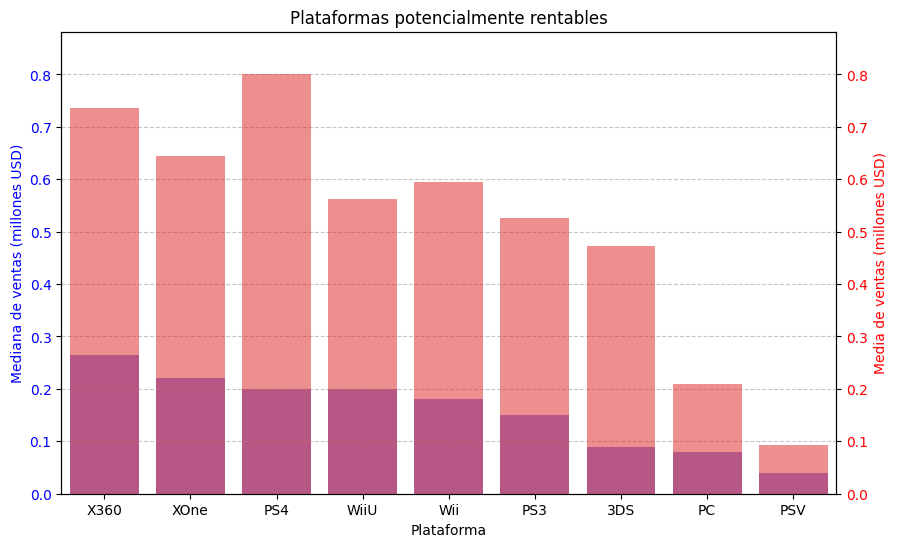

In [56]:
# Visualizando los resultados.
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la mediana de ventas en el eje principal
sns.barplot(data=most_valuable_platforms, x='platform', y='median_sales', color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Mediana de ventas (millones USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la media de ventas en el segundo eje Y
sns.barplot(data=most_valuable_platforms, x='platform', y='mean_sales', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Media de ventas (millones USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer la misma escala en ambos ejes Y
max_value = max(most_valuable_platforms['median_sales'].max(), most_valuable_platforms['mean_sales'].max())
ax1.set_ylim(0, max_value * 1.1)  # Agregar un pequeño margen
ax2.set_ylim(0, max_value * 1.1)

# Configurar el título y ejes
plt.title('Plataformas potencialmente rentables')
ax1.set_xlabel('Plataforma')

# Mostrar la cuadrícula en el eje principal
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Podemos concluir que las 5 plataformas potencialmente más rentables son: X360, PS4, XOne, Wii y WiiU. Esto se debe a que tienen los mayores promedios y medianas en ventas totales y tienen la oportunidad de crecimiento más alta al ser plataformas recientes.

Es bueno notar, que X360 es la plataforma con la mayor desviación estándar (1.66) y mediana (0.26), podríamos estudiar como afectan otras variables la distribución de ventas totales de esta plataforma (X360) y si están relacionadas con este nivel de dispersión más elevado, por ejemplo las reseñas profesionales y de usuarios.

In [57]:
# Seleccionando los juegos de X360.
x360_games = games_filtered[games_filtered['platform'] == 'X360']
x360_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
37,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
40,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Caladrius,X360,2013,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
2079,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
2083,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
2090,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


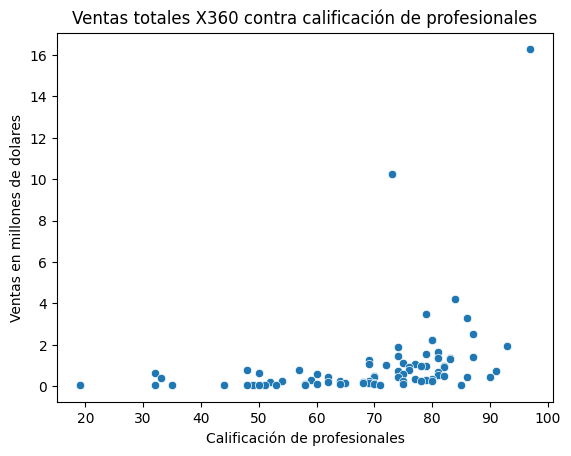

In [58]:
# Visualizando un diagrama de dispersion entre las dos variables deseadas total_sales y critic_score.
sns.scatterplot(data=x360_games, x='critic_score', y='total_sales')

# Preparando el grafico.
plt.title(f'Ventas totales X360 contra calificación de profesionales')
plt.xlabel('Calificación de profesionales')
plt.ylabel('Ventas en millones de dolares')

plt.show()

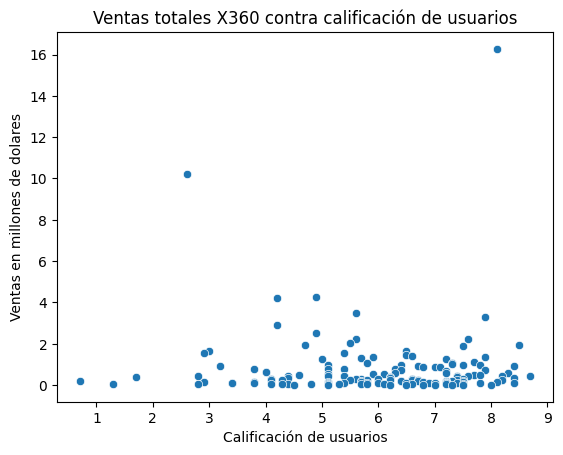

In [59]:
# Visualizando un diagrama de dispersion entre las dos variables deseadas total_sales y user_score.
sns.scatterplot(data=x360_games, x='user_score', y='total_sales')

# Preparando el grafico.
plt.title(f'Ventas totales X360 contra calificación de usuarios')
plt.xlabel('Calificación de usuarios')
plt.ylabel('Ventas en millones de dolares')

plt.show()

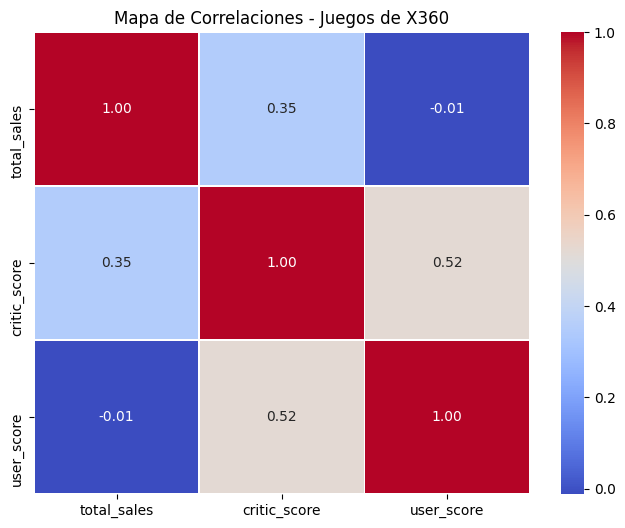

In [60]:
# Detectando la correlacion entre ventas totales, reseñas profesionales y reseñas de usuarios.
corr_matrix = x360_games[['total_sales', 'critic_score', 'user_score']].corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configuración del título
plt.title('Mapa de Correlaciones - Juegos de X360')
plt.show()

Al parecer, ni las reseñas por profesionales ni las reseñas por usuarios están fuertemente correlacionadas con las ventas totales, los valores de 0.35 y -0.01 respectivamente lo comprueban. La única correlación que parece existir es entre las reseñas de profesionales y usuarios, siendo esta una correlación positiva leve de 0.52. Esto significaría que profesionales y usuarios pueden percibir un juego de maneras similares y calificarlo de forma similar.

Algo interesante que se puede rescatar de los diagramas de dispersión en esta plataforma es como los valores más altos en ventas están medianamente más representados en las calificaciones más altas de profesionales, esto explica la ligera correlación de 0.35, aunque no lo suficientemente marcada para demostrar una tendencia.

Exploremos estas correlaciones también en la plataforma PS4, quien fue la plataforma con mayor media respectivamente.

In [61]:
# Seleccionando los juegos de PS4.
ps4_games = games_filtered[games_filtered['platform'] == 'PS4']
ps4_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
10,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
11,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
2094,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
2096,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2104,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
2105,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


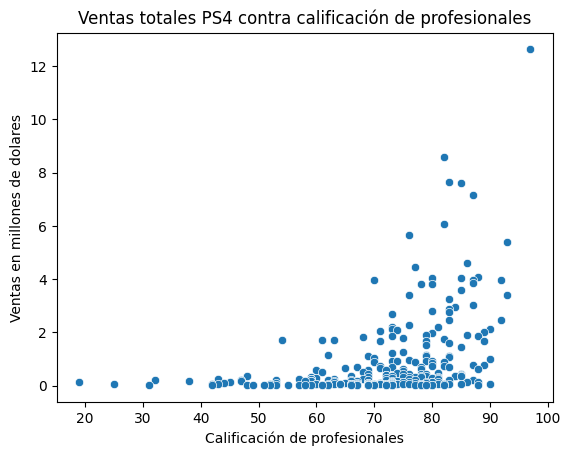

In [62]:
# Visualizando un diagrama de dispersion entre las dos variables deseadas total_sales y critic_score.
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales')

# Preparando el grafico.
plt.title(f'Ventas totales PS4 contra calificación de profesionales')
plt.xlabel('Calificación de profesionales')
plt.ylabel('Ventas en millones de dolares')

plt.show()

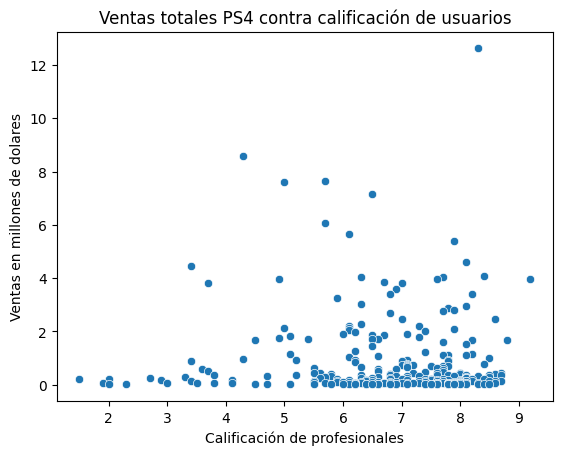

In [63]:
# Visualizando un diagrama de dispersion entre las dos variables deseadas total_sales y user_score.
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales')

# Preparando el grafico.
plt.title(f'Ventas totales PS4 contra calificación de usuarios')
plt.xlabel('Calificación de profesionales')
plt.ylabel('Ventas en millones de dolares')

plt.show()

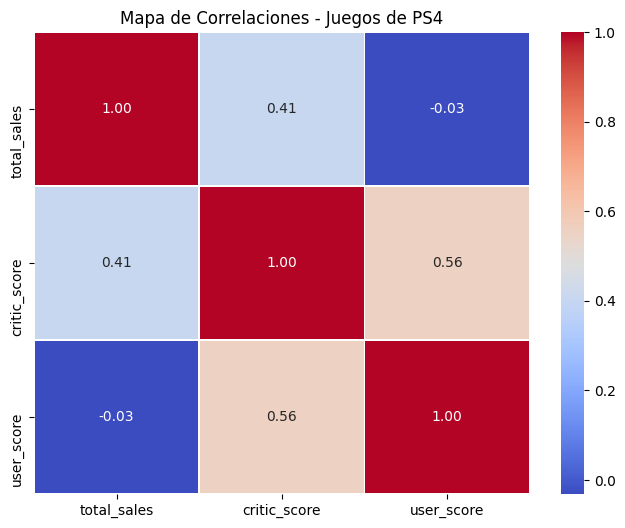

In [64]:
# Detectando la correlacion entre ventas totales, reseñas profesionales y reseñas de usuarios.
corr_matrix = ps4_games[['total_sales', 'critic_score', 'user_score']].corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configuración del título
plt.title('Mapa de Correlaciones - Juegos de PS4')
plt.show()

Nuevamente, el resultado en PS4 refleja las mismas conclusiones, una correlación de reseñas profesionales y ventas totales débiles y no completamente definida; que aumenta las ventas en algunos datos con altas reseñas, pero que continúa siendo débil en muchos otros valores. Aquí inclusive la correlación de reseñas con usuarios es cercana a 0 manteniendo una correlación nula entre las reseñas de los usuarios y las ventas totales.

Para el próximo análisis tengamos en cuenta las plataformas más rentables y cómo se diferencian en ventas para los mismos videojuegos.

In [65]:
# Enlistando los juegos de las plataformas mas rentables.
MVP = ['X360', 'PS3', 'PS4', 'Wii', 'XOne']

# Seleccionando los juegos MVP
MVP_games = games_filtered[games_filtered['platform'].isin(MVP)]

# Agrupando por juegos y encontrando los juegos multiplataforma.
multiplatform = MVP_games.groupby('name')['platform'].count()
multiplatform = list(multiplatform[multiplatform> 1].index)

# Seleccionando los juegos multiplataforma MVP.
MVP_games_multiplatform = MVP_games[MVP_games['name'].isin(multiplatform)]
MVP_games_multiplatform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
2136,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
2141,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
2145,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
2150,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [66]:
# Seleccionando 3 juegos de mayores ventas.
games_to_evaluate = list(MVP_games_multiplatform.groupby('name')['total_sales'].sum().sort_values(ascending=False).index[:3])
games_to_evaluate

['Grand Theft Auto V', 'Call of Duty: Ghosts', 'Call of Duty: Black Ops 3']

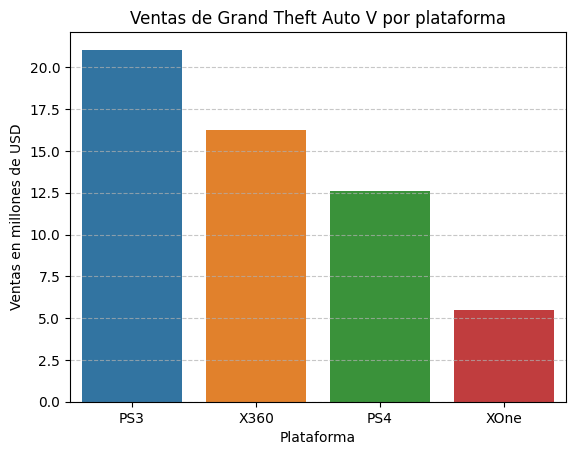

In [67]:
# Comparacion de ventas totales juego 1.
game_1 = MVP_games_multiplatform[MVP_games_multiplatform['name'] == games_to_evaluate[0]]

#Visualizando comparación.
sns.barplot(data=game_1, x='platform', y='total_sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title(f'Ventas de {games_to_evaluate[0]} por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en millones de USD')

plt.show()

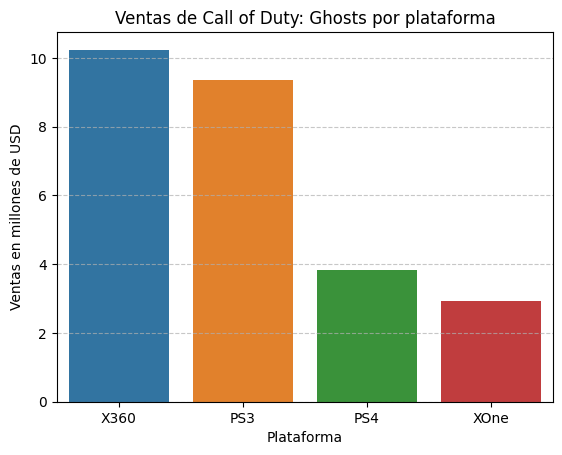

In [68]:
# Comparacion de ventas totales juego 2.
game_2 = MVP_games_multiplatform[MVP_games_multiplatform['name'] == games_to_evaluate[1]]

#Visualizando comparación.
sns.barplot(data=game_2, x='platform', y='total_sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title(f'Ventas de {games_to_evaluate[1]} por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en millones de USD')

plt.show()

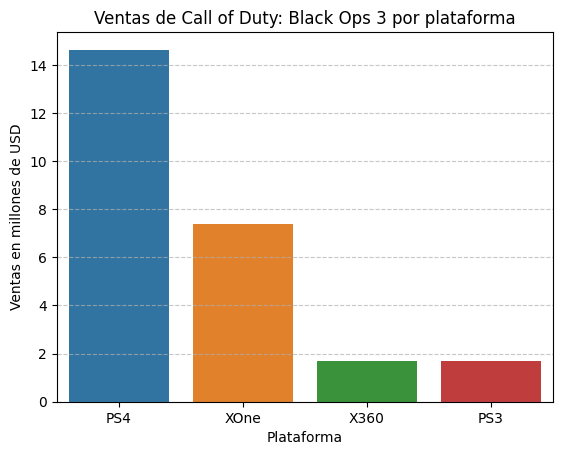

In [69]:
# Comparacion de ventas totales juego 3.
game_3 = MVP_games_multiplatform[MVP_games_multiplatform['name'] == games_to_evaluate[2]]

#Visualizando comparación.
sns.barplot(data=game_3, x='platform', y='total_sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title(f'Ventas de {games_to_evaluate[2]} por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en millones de USD')

plt.show()

En los 3 casos podemos comprobar que las ventas pueden variar significativamente para un mismo juego en función de su plataforma y no hay una tendencia o patrón observable combinando estos 3 ejemplos más allá de que Wii se queda afuera de muchos videojuegos multiplataforma.

Echemos un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables?

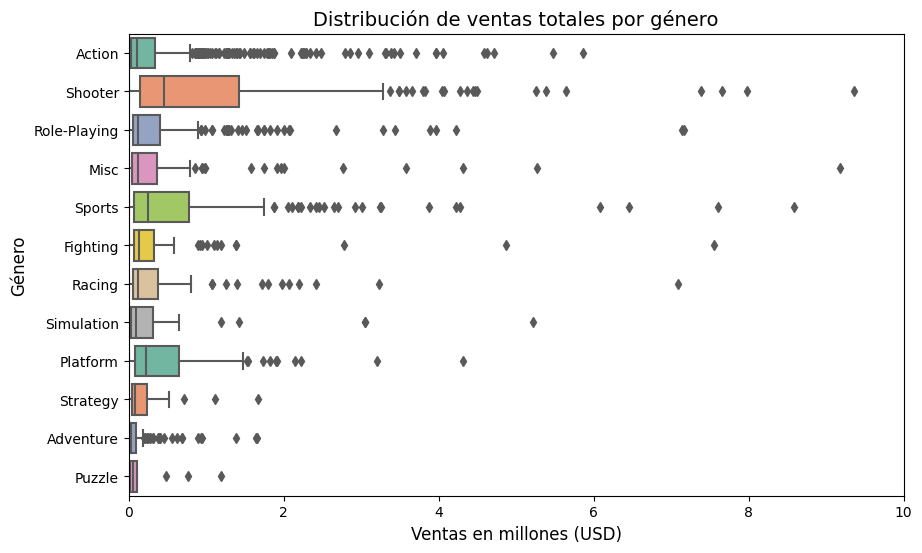

In [70]:
# Diagrama de caja para visualizar la distribución de las ventas globales por genero.
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_filtered, x='total_sales', y='genre', palette="Set2")

# Agregar título y etiquetas a los ejes
plt.title("Distribución de ventas totales por género", fontsize=14)
plt.xlabel("Ventas en millones (USD)", fontsize=12)
plt.ylabel("Género", fontsize=12)

# Limitar el eje x a un máximo de 10 millones
plt.xlim(0, 10)

# Mostrar el gráfico
plt.show()

El comportamiento de la distribución por género es similar al comportamiento que observamos por plataforma. Para cada género, comportamientos con sesgos a la derecha con múltiples valores atípicos; sin embargo, podemos destacar que el género shooter muestra el menor sesgo a la derecha. Se recomienda que se analicen los géneros más valiosos de forma similar.

In [71]:
# Agrupando los datos por genero y ventas
most_valuable_genres = games_filtered.groupby('genre')['total_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
most_valuable_genres.columns = ['games_released', 'total_sales', 'mean_sales', 'median_sales', 'std_sales']
most_valuable_genres.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
most_valuable_genres.reset_index(inplace=True)
most_valuable_genres

,genre,games_released,total_sales,mean_sales,median_sales,std_sales
0,Shooter,187,232.98,1.245882,0.450,2.014107
1,Sports,208,149.93,0.720817,0.250,1.232606
2,Platform,72,41.94,0.582500,0.225,0.816678
3,Fighting,79,35.29,0.446709,0.130,1.054493
4,Role-Playing,285,144.86,0.508281,0.120,1.368564
5,Racing,85,39.89,0.469294,0.120,0.964101
6,Misc,146,62.57,0.428562,0.115,1.034251
7,Action,752,320.51,0.426210,0.110,1.264693
8,Simulation,61,21.55,0.353279,0.100,0.856013
9,Strategy,55,10.06,0.182909,0.080,0.281159


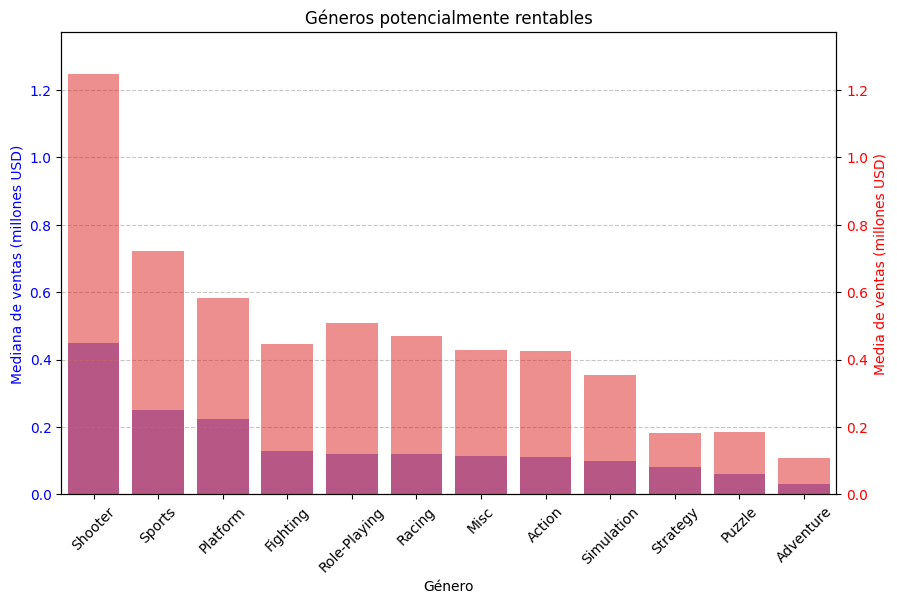

In [72]:
# Visualizando los resultados.
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la mediana de ventas en el eje principal
sns.barplot(data=most_valuable_genres, x='genre', y='median_sales', color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Mediana de ventas (millones USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la media de ventas en el segundo eje Y
sns.barplot(data=most_valuable_genres, x='genre', y='mean_sales', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Media de ventas (millones USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer la misma escala en ambos ejes Y
max_value = max(most_valuable_genres['median_sales'].max(), most_valuable_genres['mean_sales'].max())
ax1.set_ylim(0, max_value * 1.1)  # Agregar un pequeño margen
ax2.set_ylim(0, max_value * 1.1)

# Configurar el título y ejes
plt.title('Géneros potencialmente rentables')
ax1.set_xlabel('Género')
ax1.tick_params("x", rotation=45)

# Mostrar la cuadrícula en el eje principal
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Los 5 géneros potencialmente más rentables son: Shooter, Sports, Platform, Role-Playing y Racing.

A pesar de que el género con más ventas totales es Action, los valores de media y mediana indican que esto puede deberse más a que existen una gran cantidad de títulos de este género en vez de que las entregas de este género sean potencialmente rentables.

En el caso del género Fighting, los géneros Role-Playing y Racing demostraron un mejor promedio con tan solo 2 centésimas de diferencia en su mediana, esto los ubica de mejor manera como géneros potencialmente rentables.

### 2.4. Análisis descriptivo por regiones. <a id='regions_analysis'></a>

Ahora revisaremos las variables para cada una de las 3 regiones individualmente. Iniciemos por observar las ventas totales para cada región.

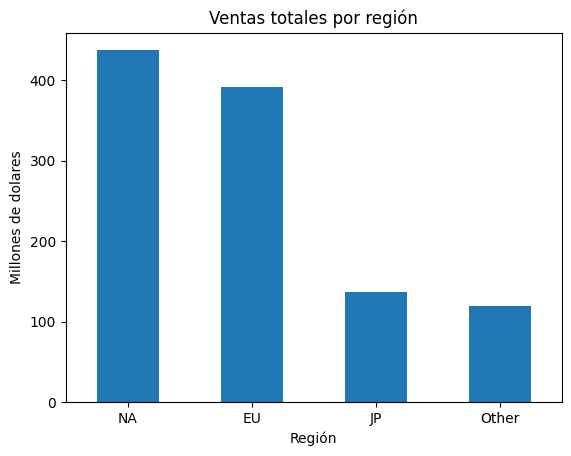

In [73]:
# Extraer la sumatoria para cada venta de cada región.
na_sales = games_filtered['na_sales'].sum()
eu_sales = games_filtered['eu_sales'].sum()
jp_sales = games_filtered['jp_sales'].sum()
other_sales = games_filtered['other_sales'].sum()

# Generar un Dataframe para denerar un diagrama de barras.
sales = pd.DataFrame([{'sales':na_sales}, {'sales': eu_sales}, {'sales':jp_sales}, {'sales':other_sales}], index=['NA', 'EU', 'JP', 'Other'])

sales.plot(kind='bar', rot=0, legend=False, xlabel='Región', ylabel='Millones de dolares', title='Ventas totales por región')
plt.show()

La región con mayores ventas es Norteamérica, mientras que la región con menos ventas es Japón, casi igualando las ventas en total en otras partes del mundo. Para los siguientes análisis solo incluiremos las 3 regiones principales y excluiremos al resto del mundo.

Iniciemos estudiando el desempeño de cada plataforma por región.

In [74]:
# Agrupando los datos por plataforma y region NA
na_platform_sales = games_filtered.groupby('platform')['na_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
na_platform_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
na_platform_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
na_platform_sales.reset_index(inplace=True)

# Se filtran las plataformas recientes.
na_platform_sales = na_platform_sales[na_platform_sales['platform'].isin(recent_platforms)]
na_platform_sales.reset_index(drop=True, inplace=True)
na_platform_sales

,platform,games_released,sales,mean_sales,median_sales,std_sales
0,X360,186,81.66,0.439032,0.15,1.021400
1,XOne,247,93.12,0.377004,0.12,0.630618
2,WiiU,115,29.21,0.254000,0.09,0.473655
3,PS4,392,108.74,0.277398,0.06,0.583723
4,Wii,23,6.56,0.285217,0.04,0.505154
5,PS3,345,63.50,0.184058,0.03,0.521613
6,3DS,303,38.20,0.126073,0.00,0.499331
7,PC,189,11.11,0.058783,0.00,0.127805
8,PSV,358,5.04,0.014078,0.00,0.035851


In [75]:
# Agrupando los datos por plataforma y region EU
eu_platform_sales = games_filtered.groupby('platform')['eu_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
eu_platform_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
eu_platform_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
eu_platform_sales.reset_index(inplace=True)

# Se filtran las plataformas recientes.
eu_platform_sales = eu_platform_sales[eu_platform_sales['platform'].isin(recent_platforms)]
eu_platform_sales.reset_index(drop=True, inplace=True)
eu_platform_sales

,platform,games_released,sales,mean_sales,median_sales,std_sales
0,Wii,23,5.93,0.257826,0.10,0.345450
1,PS4,392,141.09,0.359923,0.08,0.810843
2,X360,186,42.52,0.228602,0.08,0.538409
3,XOne,247,51.59,0.208866,0.07,0.365306
4,WiiU,115,19.85,0.172609,0.07,0.295362
5,PC,189,25.36,0.134180,0.06,0.212022
6,PS3,345,67.81,0.196551,0.02,0.657879
7,3DS,303,30.96,0.102178,0.00,0.381832
8,PSV,358,6.10,0.017039,0.00,0.057484


In [76]:
# Agrupando los datos por plataforma y region JA
jp_platform_sales = games_filtered.groupby('platform')['jp_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
jp_platform_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
jp_platform_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
jp_platform_sales.reset_index(inplace=True)

# Se filtran las plataformas recientes.
jp_platform_sales = jp_platform_sales[jp_platform_sales['platform'].isin(recent_platforms)]
jp_platform_sales.reset_index(drop=True, inplace=True)
jp_platform_sales

,platform,games_released,sales,mean_sales,median_sales,std_sales
0,3DS,303,67.81,0.223795,0.06,0.566661
1,PS3,345,23.35,0.067681,0.03,0.109196
2,PSV,358,18.59,0.051927,0.03,0.075437
3,PS4,392,15.96,0.040714,0.01,0.069101
4,WiiU,115,10.88,0.094609,0.00,0.235351
5,X360,186,0.51,0.002742,0.00,0.007953
6,Wii,23,0.05,0.002174,0.00,0.010426
7,XOne,247,0.34,0.001377,0.00,0.005153
8,PC,189,0.00,0.000000,0.00,0.000000


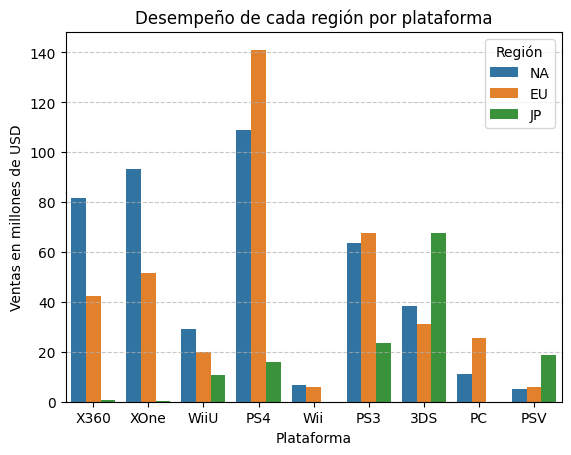

In [77]:
# Comparando el desempeño de cada plataforma sesgado por región.
na_platform_sales['region'] = 'NA'
eu_platform_sales['region'] = 'EU'
jp_platform_sales['region'] = 'JP'

# Visualizacion de la información.
all_region_platform_sales = pd.concat([na_platform_sales[['platform', 'sales', 'region']], eu_platform_sales[['platform', 'sales', 'region']], jp_platform_sales[['platform', 'sales', 'region']]])

sns.barplot(data=all_region_platform_sales, x='platform', y='sales', hue='region', dodge=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Desempeño de cada región por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en millones de USD')
plt.legend(title='Región')
plt.show()

Las plataformas favoritas en Norteamérica son PS4, XOne y X360. En el caso de Europa, PS4, PS3 y XOne son quienes tienen más ventas. Finalmente, Japón prefiere 3DS, PS3 y PSV.

Al parecer, Japón tiene ventas muy diferentes a Norteamérica y Europa, siendo algunas plataformas favoritas de estas regiones las ventas más bajas de este análisis para Japón.

Observemos el comportamiento de las ventas con más detalle en cada región.

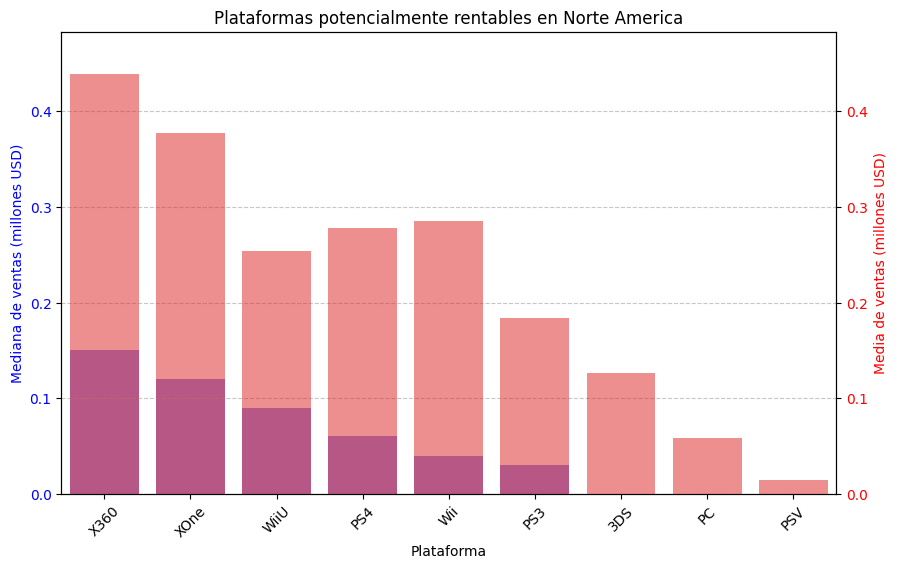

In [78]:
# Visualizando los resultados.
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la mediana de ventas en el eje principal
sns.barplot(data=na_platform_sales, x='platform', y='median_sales', color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Mediana de ventas (millones USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la media de ventas en el segundo eje Y
sns.barplot(data=na_platform_sales, x='platform', y='mean_sales', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Media de ventas (millones USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer la misma escala en ambos ejes Y
max_value = max(na_platform_sales['median_sales'].max(), na_platform_sales['mean_sales'].max())
ax1.set_ylim(0, max_value * 1.1)  # Agregar un pequeño margen
ax2.set_ylim(0, max_value * 1.1)

# Configurar el título y ejes
plt.title('Plataformas potencialmente rentables en Norte America')
ax1.set_xlabel('Plataforma')
ax1.tick_params("x", rotation=45)

# Mostrar la cuadrícula en el eje principal
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Las 5 plataformas potencialmente más rentables en Norteamérica son X360, XOne, WiiU, PS4 y Wii.

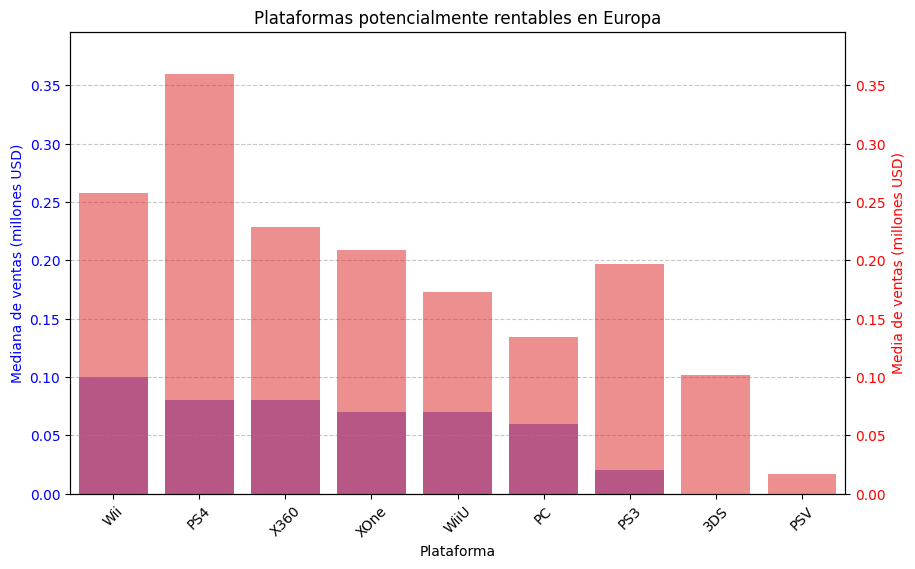

In [79]:
# Visualizando los resultados.
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la mediana de ventas en el eje principal
sns.barplot(data=eu_platform_sales, x='platform', y='median_sales', color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Mediana de ventas (millones USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la media de ventas en el segundo eje Y
sns.barplot(data=eu_platform_sales, x='platform', y='mean_sales', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Media de ventas (millones USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer la misma escala en ambos ejes Y
max_value = max(eu_platform_sales['median_sales'].max(), eu_platform_sales['mean_sales'].max())
ax1.set_ylim(0, max_value * 1.1)  # Agregar un pequeño margen
ax2.set_ylim(0, max_value * 1.1)

# Configurar el título y ejes
plt.title('Plataformas potencialmente rentables en Europa')
ax1.set_xlabel('Plataforma')
ax1.tick_params("x", rotation=45)

# Mostrar la cuadrícula en el eje principal
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Las 5 plataformas potencialmente más rentables en Europa son PS4, Wii, X360, XOne y WiiU.

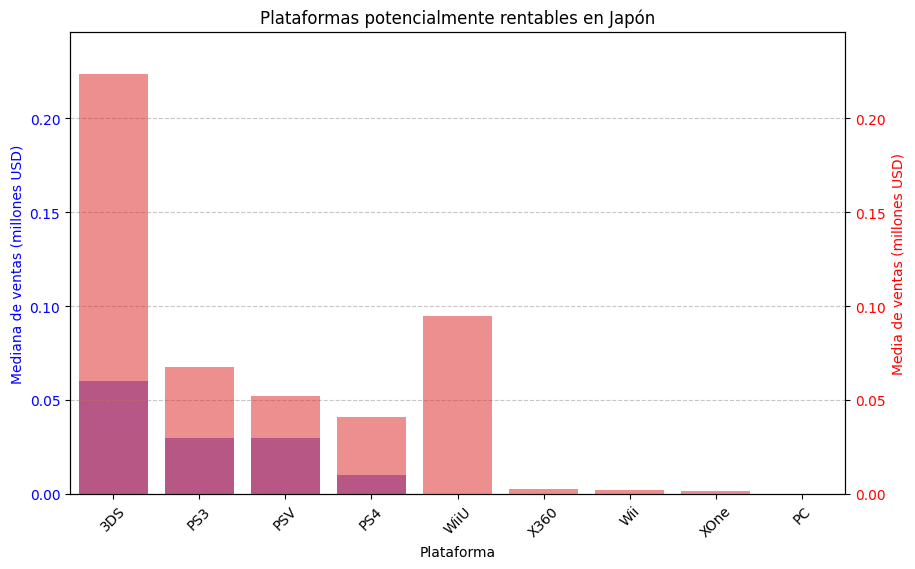

In [80]:
# Visualizando los resultados.
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la mediana de ventas en el eje principal
sns.barplot(data=jp_platform_sales, x='platform', y='median_sales', color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Mediana de ventas (millones USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la media de ventas en el segundo eje Y
sns.barplot(data=jp_platform_sales, x='platform', y='mean_sales', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Media de ventas (millones USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer la misma escala en ambos ejes Y
max_value = max(jp_platform_sales['median_sales'].max(), jp_platform_sales['mean_sales'].max())
ax1.set_ylim(0, max_value * 1.1)  # Agregar un pequeño margen
ax2.set_ylim(0, max_value * 1.1)

# Configurar el título y ejes
plt.title('Plataformas potencialmente rentables en Japón')
ax1.set_xlabel('Plataforma')
ax1.tick_params("x", rotation=45)

# Mostrar la cuadrícula en el eje principal
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Las 5 plataformas potencialmente más rentables en Japón son 3DS, PS3, PSV, PS4 y WiiU. Algo que se destaca es que las plataformas portátiles son muy atractivas en esta región, al igual que las plataformas más recientes de Nintendo.

Ahora realizamos un análisis descriptivo por géneros.

In [81]:
# Agrupando los datos por genero y ventas NA
na_genre_sales = games_filtered.groupby('genre')['na_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
na_genre_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
na_genre_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
na_genre_sales.reset_index(inplace=True)
na_genre_sales

,genre,games_released,sales,mean_sales,median_sales,std_sales
0,Shooter,187,109.74,0.586845,0.20,0.993237
1,Sports,208,65.27,0.313798,0.09,0.494231
2,Platform,72,17.93,0.249028,0.09,0.369172
3,Fighting,79,15.55,0.196835,0.05,0.509853
4,Racing,85,12.96,0.152471,0.03,0.391191
5,Misc,146,27.46,0.188082,0.02,0.560504
6,Action,752,125.83,0.167327,0.02,0.547399
7,Role-Playing,285,46.40,0.162807,0.02,0.510073
8,Simulation,61,4.75,0.077869,0.00,0.195296
9,Strategy,55,3.28,0.059636,0.00,0.130979


In [82]:
# Agrupando los datos por genero y ventas EU
eu_genre_sales = games_filtered.groupby('genre')['eu_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
eu_genre_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
eu_genre_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
eu_genre_sales.reset_index(inplace=True)
eu_genre_sales

,genre,games_released,sales,mean_sales,median_sales,std_sales
0,Shooter,187,87.86,0.469840,0.190,0.767501
1,Platform,72,15.15,0.210417,0.080,0.273354
2,Racing,85,20.19,0.237529,0.060,0.404180
3,Sports,208,60.34,0.290096,0.050,0.810127
4,Simulation,61,10.84,0.177705,0.030,0.399364
5,Strategy,55,4.22,0.076727,0.030,0.129186
6,Action,752,117.87,0.156742,0.020,0.520874
7,Fighting,79,8.55,0.108228,0.020,0.230761
8,Misc,146,20.00,0.136986,0.015,0.376088
9,Role-Playing,285,36.97,0.129719,0.010,0.428462


In [83]:
# Agrupando los datos por genero y ventas JA
jp_genre_sales = games_filtered.groupby('genre')['jp_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
jp_genre_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
jp_genre_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
jp_genre_sales.reset_index(inplace=True)
jp_genre_sales

,genre,games_released,sales,mean_sales,median_sales,std_sales
0,Role-Playing,285,50.01,0.175474,0.05,0.506286
1,Fighting,79,7.63,0.096582,0.03,0.290525
2,Puzzle,17,1.18,0.069412,0.02,0.101456
3,Misc,146,9.03,0.061849,0.02,0.131726
4,Action,752,39.65,0.052726,0.01,0.169580
5,Adventure,211,5.11,0.024218,0.01,0.052433
6,Simulation,61,4.52,0.074098,0.00,0.299963
7,Platform,72,4.79,0.066528,0.00,0.178769
8,Shooter,187,6.61,0.035348,0.00,0.121961
9,Strategy,55,1.75,0.031818,0.00,0.065407


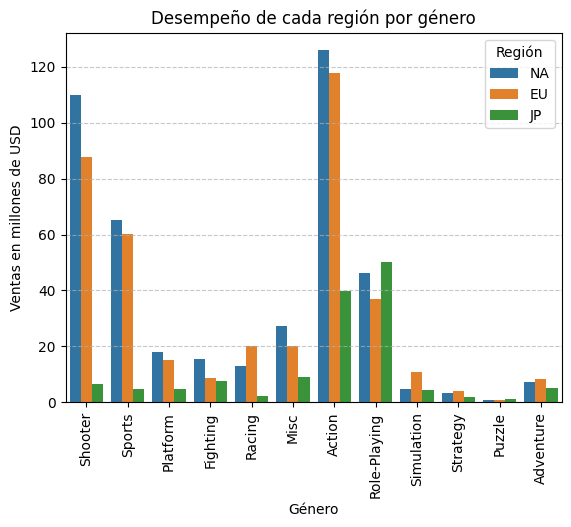

In [84]:
# Comparando el desempeño de cada género sesgado por región. 
na_genre_sales['region'] = 'NA'
eu_genre_sales['region'] = 'EU'
jp_genre_sales['region'] = 'JP'

# Visualizando los resultados.
all_region_genre_sales = pd.concat([na_genre_sales[['genre', 'sales', 'region']], eu_genre_sales[['genre', 'sales', 'region']], jp_genre_sales[['genre', 'sales', 'region']]])

sns.barplot(data=all_region_genre_sales, x='genre', y='sales', hue='region', dodge=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Desempeño de cada región por género')
plt.xlabel('Género')
plt.ylabel('Ventas en millones de USD')
plt.legend(title='Región')
plt.xticks(rotation=90)
plt.show()

La mayor cantidad de ventas en Norteamérica son generadas por los géneros Action, Shooter y Sports. En la región de Europa observamos las mismas tendencias en las ganancias, mientras que Japón se diferencia bastante, ya que Role-Playing destaca sobre el resto de regiones, seguido por Action y Misc.

Action y Role-Playing son géneros destacados en ventas para las 3 regiones, algo resaltable.

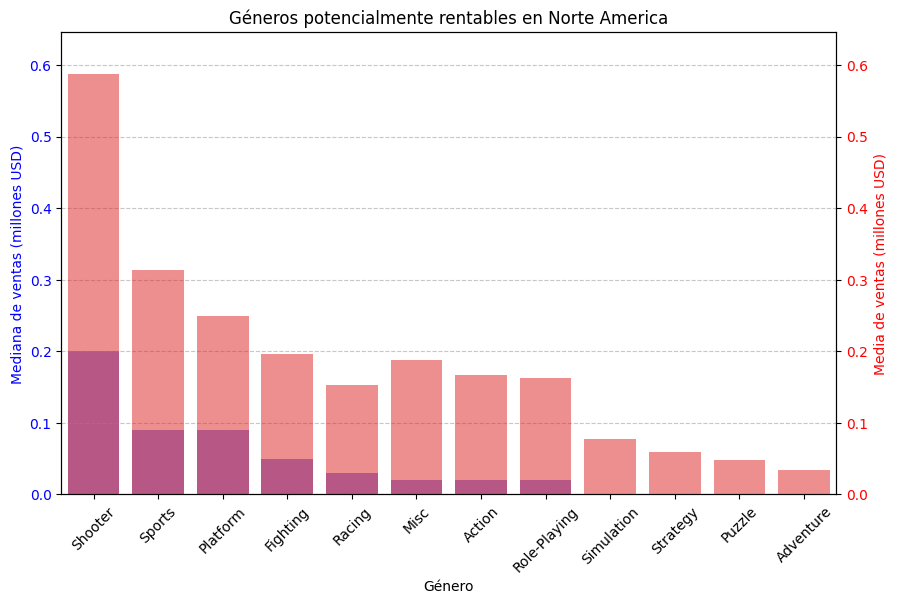

In [85]:
# Visualizando los resultados.
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la mediana de ventas en el eje principal
sns.barplot(data=na_genre_sales, x='genre', y='median_sales', color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Mediana de ventas (millones USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la media de ventas en el segundo eje Y
sns.barplot(data=na_genre_sales, x='genre', y='mean_sales', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Media de ventas (millones USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer la misma escala en ambos ejes Y
max_value = max(na_genre_sales['median_sales'].max(), na_genre_sales['mean_sales'].max())
ax1.set_ylim(0, max_value * 1.1)  # Agregar un pequeño margen
ax2.set_ylim(0, max_value * 1.1)

# Configurar el título y ejes
plt.title('Géneros potencialmente rentables en Norte America')
ax1.set_xlabel('Género')
ax1.tick_params("x", rotation=45)

# Mostrar la cuadrícula en el eje principal
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Los 5 géneros potencialmente más rentables en Norteamérica son Shooter, Sports, Platform, Fighting y Racing.

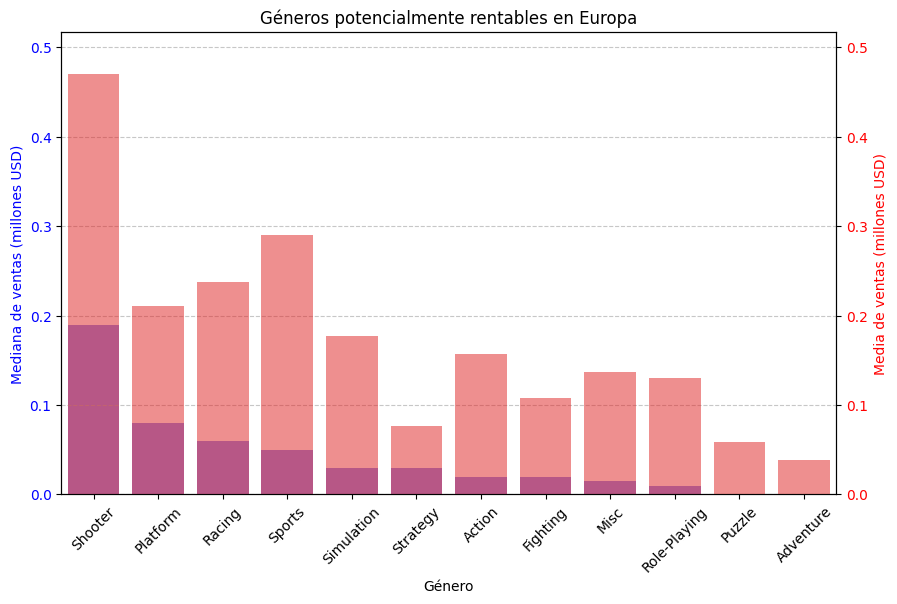

In [86]:
# Visualizando los resultados.
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la mediana de ventas en el eje principal
sns.barplot(data=eu_genre_sales, x='genre', y='median_sales', color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Mediana de ventas (millones USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la media de ventas en el segundo eje Y
sns.barplot(data=eu_genre_sales, x='genre', y='mean_sales', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Media de ventas (millones USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer la misma escala en ambos ejes Y
max_value = max(eu_genre_sales['median_sales'].max(), eu_genre_sales['mean_sales'].max())
ax1.set_ylim(0, max_value * 1.1)  # Agregar un pequeño margen
ax2.set_ylim(0, max_value * 1.1)

# Configurar el título y ejes
plt.title('Géneros potencialmente rentables en Europa')
ax1.set_xlabel('Género')
ax1.tick_params("x", rotation=45)

# Mostrar la cuadrícula en el eje principal
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Los 5 géneros potencialmente más rentables en Europa son Shooter, Platform, Racing, Sports y Simulation. Son los mismos géneros que evidenciamos en Norteamérica en su mayoría, ambas regiones tienen comportamientos similares con algunas pequeñas variaciones.

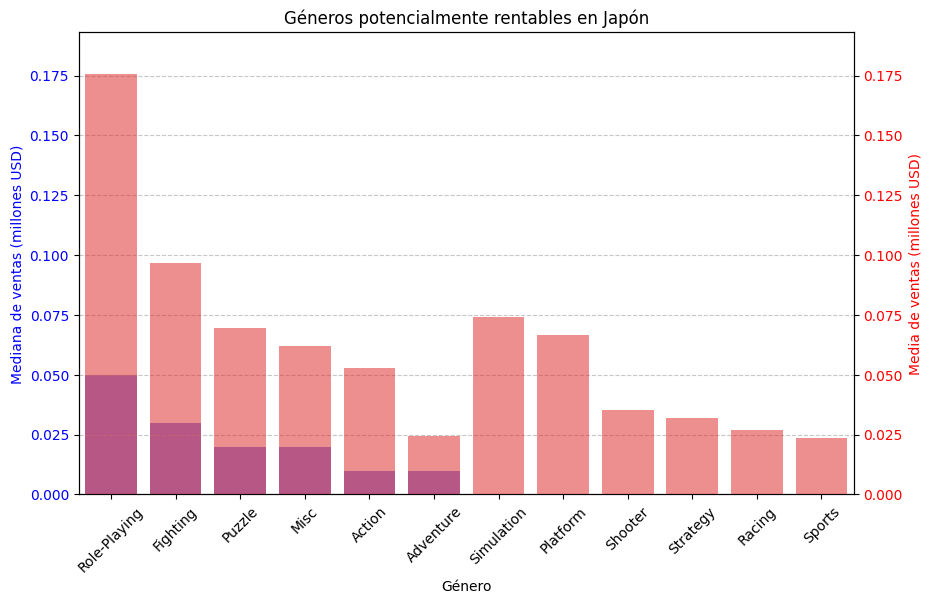

In [87]:
# Visualizando los resultados.
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la mediana de ventas en el eje principal
sns.barplot(data=jp_genre_sales, x='genre', y='median_sales', color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Mediana de ventas (millones USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la media de ventas en el segundo eje Y
sns.barplot(data=jp_genre_sales, x='genre', y='mean_sales', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Media de ventas (millones USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer la misma escala en ambos ejes Y
max_value = max(jp_genre_sales['median_sales'].max(), jp_genre_sales['mean_sales'].max())
ax1.set_ylim(0, max_value * 1.1)  # Agregar un pequeño margen
ax2.set_ylim(0, max_value * 1.1)

# Configurar el título y ejes
plt.title('Géneros potencialmente rentables en Japón')
ax1.set_xlabel('Género')
ax1.tick_params("x", rotation=45)

# Mostrar la cuadrícula en el eje principal
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Los 5 géneros potencialmente más rentables en Japón son Role-Playing, Fighting, Puzzle, Misc, y Action, y se diferencian notablemente de las otras regiones.

Finalmente, para nuestro estudio revisaremos un análisis por clasificación y si estas tienen alguna influencia sobre las ventas regionales.

In [88]:
# Agrupando los datos por rating y ventas NA
na_rating_sales = games_filtered.groupby('rating')['na_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
na_rating_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
na_rating_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
na_rating_sales.reset_index(inplace=True)
na_rating_sales

,rating,games_released,sales,mean_sales,median_sales,std_sales
0,M,369,165.21,0.447724,0.14,0.912329
1,E10+,250,54.02,0.216080,0.12,0.318003
2,E,296,78.94,0.266689,0.05,0.475497
3,T,332,49.79,0.149970,0.04,0.336312


In [89]:
# Agrupando los datos por rating y ventas EU
eu_rating_sales = games_filtered.groupby('rating')['eu_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
eu_rating_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
eu_rating_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
eu_rating_sales.reset_index(inplace=True)
eu_rating_sales

,rating,games_released,sales,mean_sales,median_sales,std_sales
0,M,369,145.32,0.393821,0.13,0.812837
1,E10+,250,42.53,0.170120,0.10,0.208036
2,E,296,82.80,0.279730,0.05,0.715595
3,T,332,41.95,0.126355,0.04,0.279411


In [90]:
# Agrupando los datos por rating y ventas JA
jp_rating_sales = games_filtered.groupby('rating')['jp_sales'].agg(['count', 'sum', 'mean', 'median','std'])

# Organizando los datos
jp_rating_sales.columns = ['games_released', 'sales', 'mean_sales', 'median_sales', 'std_sales']
jp_rating_sales.sort_values(['median_sales', 'mean_sales'], ascending=False, inplace=True)
jp_rating_sales.reset_index(inplace=True)
jp_rating_sales

,rating,games_released,sales,mean_sales,median_sales,std_sales
0,T,332,20.44,0.061566,0.01,0.169567
1,E,296,15.00,0.050676,0.00,0.174755
2,M,369,14.11,0.038238,0.00,0.089551
3,E10+,250,5.89,0.023560,0.00,0.108386


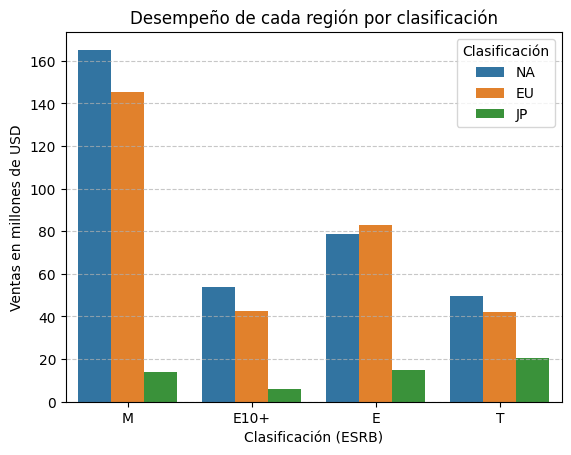

In [91]:
# Comparando el desempeño de cada clasificación sesgado por región.
na_rating_sales['region'] = 'NA'
eu_rating_sales['region'] = 'EU'
jp_rating_sales['region'] = 'JP'

# Visualizando los resultados
all_region_rating_sales = pd.concat([na_rating_sales[['rating', 'sales', 'region']], eu_rating_sales[['rating', 'sales', 'region']], jp_rating_sales[['rating', 'sales', 'region']]])

sns.barplot(data=all_region_rating_sales, x='rating', y='sales', hue='region', dodge=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Desempeño de cada región por clasificación')
plt.xlabel('Clasificación (ESRB)')
plt.ylabel('Ventas en millones de USD')
plt.legend(title='Clasificación')

plt.show()

Notamos que las clasificaciones AO, K-A, EC y RP no tienen suficientes datos en ninguna región como para determinar alguna conclusión sobre su influencia en las ventas, es por eso que limitaremos nuestras conclusiones a las clasificaciones M, E, E10+ y T.

Norteamérica y Europa muestran mejores ventas en la clasificación M; sin embargo, Japón contrasta teniendo pocas ventas en esta categoría.

Si observamos las medianas de las clasificaciones relevantes, nos damos cuenta de que la clasificación M tiene mejor mediana en ventas en Norteamérica y Europa, por lo que la determinaremos como la clasificación potencialmente más rentable en estas. La diferencia se marca en Japón, quien muestra mejores tendencias de venta en su media para la clasificación T.

Estas conclusiones las confirma nuestra visualización, la cual muestra comportamientos similares para Norteamérica y Europa, mientras que Japón describe mayores ventas en la clasificación T y menores en la M, la cual es la segunda más relevante en las otras regiones.

## 3. Pruebas de las hipótesis estadísticas. <a id='hypothesis'></a>

Realizaremos dos pruebas de hipótesis para nuestro estudio.

1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Para formular nuestra hipótesis nula, describiremos la situación en donde no hay cambios en la comparación con los promedios. Nuestra hipótesis alternativa, por otro lado, describirá la situación en donde se perciben cambios en nuestra comparación.

Estableceremos el valor del umbral de significancia (alfa) como 0.05 para ambos casos.

### 3.1. Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. <a id='hypothesis_1'></a>

**Hipótesis nula:** las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

**Hipótesis alternativa:** las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren.

In [92]:
# Prueba la hipótesis
# Encontramos las calificaciones promedio de los usuarios para las plataformas XOne y PC, ignorando los valores nulos.
user_score_XOne = games_filtered[games_filtered['platform'] == 'XOne']['user_score'].dropna()
user_score_PC = games_filtered[games_filtered['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

resultados = st.ttest_ind(user_score_XOne, user_score_PC, equal_var=False)

print('valor p: ', resultados.pvalue)

# Comparamos el valor p con el umbral
if resultados.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.14759594013430463
No podemos rechazar la hipótesis nula


El valor p es significativo (14%), por lo que la posibilidad de que las calificaciones promedio provenientes de los usuarios para las plataformas XOne y PC sean iguales existe y se debe considerar, lo que **NO** nos permite rechazar la hipótesis nula.

Ya que consideramos la hipótesis nula, podemos responder a nuestra hipótesis original concluyendo que: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **SI** pueden ser las mismas.

### 3.2. Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. <a id='hypothesis_2'></a>

**Hipótesis nula:** las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

**Hipótesis alternativa:** las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [93]:
# Prueba la hipótesis
# Encontramos las calificaciones promedio de los usuarios para los generos Action y Sports, ignorando los valores nulos.
user_score_Action = games_filtered[games_filtered['genre'] == 'Action']['user_score'].dropna()
user_score_Sports = games_filtered[games_filtered['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

resultados = st.ttest_ind(user_score_Action, user_score_Sports, equal_var=False)

print('valor p: ', resultados.pvalue)

# Comparamos el valor p con el umbral
if resultados.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  2.419141451747253e-20
Rechazamos la hipótesis nula


El valor p es increíblemente bajo, lo que nos deja saber que podemos descartar la hipótesis de que el promedio de las calificaciones para los dos géneros podría ser igual.

Con esto en mente, podemos confirmar nuestra hipótesis original de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren, ya que la probabilidad de que sean iguales es casi imposible.

## Conclusiones <a id='end'></a>

Después de realizar los análisis para los datos presentados, podemos concluir lo siguiente para nuestra campaña publicitaria del 2017:

- La campaña publicitaria para el 2017 debería enfocarse únicamente sobre las plataformas más recientes, ya que son estas las que registran una mayor cantidad de ingresos históricamente. Estas plataformas son 'PS3', 'PS4', 'PSV', '3DS', 'Wii', 'WiiU', 'X360', 'PC' y 'XOne'.

- Las campañas publicitarias deberían orientarse de forma diferente para las regiones estudiadas, en donde las regiones de Norte América y Europa pueden compartir campañas al tener comportamientos similares; sin embargo, Japón debe tener otros enfoques diferentes basados en las tendencias observadas.

- La región de Norteamérica ha demostrado históricamente un mayor volumen de ventas, por lo que se recomienda que la campaña  destine un mayor porcentaje de su presupuesto a esta región.

- Los géneros Action y Role-Playing fueron géneros destacados en ventas para las 3 regiones, algo resaltable por lo que un enfoque en la campaña para estos dos géneros podrían ser utilizados para todas las regiones y tener buenos resultados.

- Los juegos con una clasificación M tienen mejores registros de ventas en Norteamérica y Europa, por lo que un enfoque en la campaña publicitaria para estos juegos podrían tener buenos resultados en dichas regiones. Como segunda opción, los juegos con clasificación T se destacan también en Japón.

- En un enfoque regional personalizado para la campaña, Norteamérica debería enfocarse en juegos del género Shooter en la plataforma X360, Europa debería enfocarse en juegos del género Shooter en la plataforma PS4 y Japón debería enfocarse en el género Role-Playing en la plataforma 3DS. Adicionalmente, se observó que Japón tiene mejores resultados en plataformas portátiles y de Nintendo.